In [1]:
## analyze same analytics with other cascades(as with juul)..
## look at all other cascades...

In [1]:
import pandas as pd
import numpy as np
import os
import git
import ast
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm_notebook as tqdm
import tweepy
from cascade import Cascade

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [9]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [10]:
def get_shells(G):
    nodes_depth = nx.get_node_attributes(G,'level')
    if not(nodes_depth):
        nodes_depth = nx.get_node_attributes(G,'depth')
    if nodes_depth:
        counter = 0
        shells = list()
        while True:
            if ([k for k,v in nodes_depth.items() if v == counter]):
                shells.append([k for k,v in nodes_depth.items() if v == counter])
                counter += 1 
            else:
                break
        return(shells)
    else:
        print("depth not encoded in graph")
    

In [11]:
def get_color_map(pos,shells):
    depth_nodes = dict()
    color_map = list()
    for idx,nodes in enumerate(shells):
        depth_nodes[idx] = nodes
    color_list = ["yellow","green","blue","pink","violet"]
    for node in pos.keys():
        depth = [depth for depth,nodes in depth_nodes.items() if node in nodes][0]
        color_map.append(color_list[depth])  
    return(color_map)

In [75]:
def plot(G):
    %matplotlib inline
    plt.figure(figsize=(8,8))
    shells = get_shells(G)
    if (shells):
        pos = nx.shell_layout(G,shells)
        color_map = get_color_map(pos,shells)
        nx.draw(G,with_labels=False,nodelist=pos.keys(),pos=pos,node_color=color_map)
    else:
        nx.draw(G,with_labels=False)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_axis_off()
    plt.title("cascade")
    plt.show()

## reading input files

In [12]:
model_path = os.path.join(get_git_root(os.getcwd()),"models")

In [111]:
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")
model_path = os.path.join(get_git_root(os.getcwd()),"models")
graph_path = os.path.join(get_git_root(os.getcwd()),"models","graphs")
friends_path = os.path.join(get_git_root(os.getcwd()),"input","following_final.csv")

In [302]:
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")
friends_data = pd.read_csv(friends_path)

In [103]:
## get all of the cascades..# this is not unique value some would have repeated users..
len(hexagon_data.loc[hexagon_data['retweetCount'] >= 1])

7006

In [104]:
## getting the tweet text and their occurances
tweet_text_list = list()
df_tweets = pd.DataFrame([])
for index,tweet in hexagon_data.iterrows():
    user = tweet['userID']
    text = tweet['tweetText']
    retweet_count = tweet['retweetCount']
    if retweet_count > 0:
        if text not in tweet_text_list:
            tweet_text_list.append(text)
            df_tweets = df_tweets.append(pd.DataFrame({'tweet_text':text, 
                                           'retweet_count':retweet_count},index=[0]),
                             ignore_index=True)

In [105]:
## there are 1771 cascades = 0
len(df_tweets.loc[df_tweets.retweet_count ==0])

0

In [106]:
## there are 1771 cascades > 0
len(df_tweets.loc[df_tweets.retweet_count >0])

1771

In [109]:
len(df_tweets.loc[df_tweets.retweet_count >=2])

751

In [ ]:
(df_tweets.loc[df_tweets.retweet_count >10])

In [582]:
cascade_t = hexagon_data.loc[hexagon_data.userID == 2937602802]
tweet_text = list(cascade_t['tweetText'])[0]

In [584]:
cascade = hexagon_data.loc[hexagon_data.tweetText == tweet_text]
cascade['tweetCreatedAt'] = pd.to_datetime(cascade['tweetCreatedAt'])
cascade.sort_values(by='tweetCreatedAt', ascending=True, inplace=True)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [585]:
source_node = cascade.head(1)['userID'].values[0]

In [587]:
user_list = list(cascade.userID)
user_list.remove(source_node)

In [589]:
source_node

2937602802

In [588]:
user_list

[2602916816,
 572907926,
 2159584141,
 283092227,
 3740327718,
 4184236933,
 1422111620]

In [ ]:
c1 = cas.get_cascade(cascade,source_node,user_list)

In [344]:
cas = Cascade()
for i in range(len(df_tweets[2:5])):
    cascade = hexagon_data.loc[hexagon_data.tweetText == df_tweets.tweet_text[i]]
    cascade['tweetCreatedAt'] = pd.to_datetime(cascade['tweetCreatedAt'])
    cascade.sort_values(by='tweetCreatedAt',ascending = True, inplace=True)
    source_node = cascade.head(1)['userID'].values[0]
    retweet_count = cascade.head(1)['retweetCount'].values[0]
    users = list(cascade['userID'])
    users.remove(source_node)
    G =  cas.get_cascade(cascade,source_node,users,level_termiante=None)
    filename = str('G_' + str(source_node) + '_'+ str(retweet_count)+'.gpickle')
    if G:
        nx.write_gpickle(G,os.path.join(model_path,'graphs',filename))
    else:
        print("blank_graph")

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
  0%|          | 0/7 [00:00<?, ?it/s]

blank_graph


  0%|          | 0/5 [00:00<?, ?it/s]

finding connection for followers network might take some time



100%|██████████| 5/5 [00:00<00:00, 528.93it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

at level 1
finding connection for followers network might take some time

at level 2
breaking as no progression


100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

blank_graph


## plot graph

In [448]:
# lets read all the cascades and get some metrics
import os
filenames = [file for file in os.listdir(os.path.join(os.getcwd(),graph_path)) if file.endswith(".gpickle")]

In [449]:
filenames.remove('G_juul_cascade.gpickle')

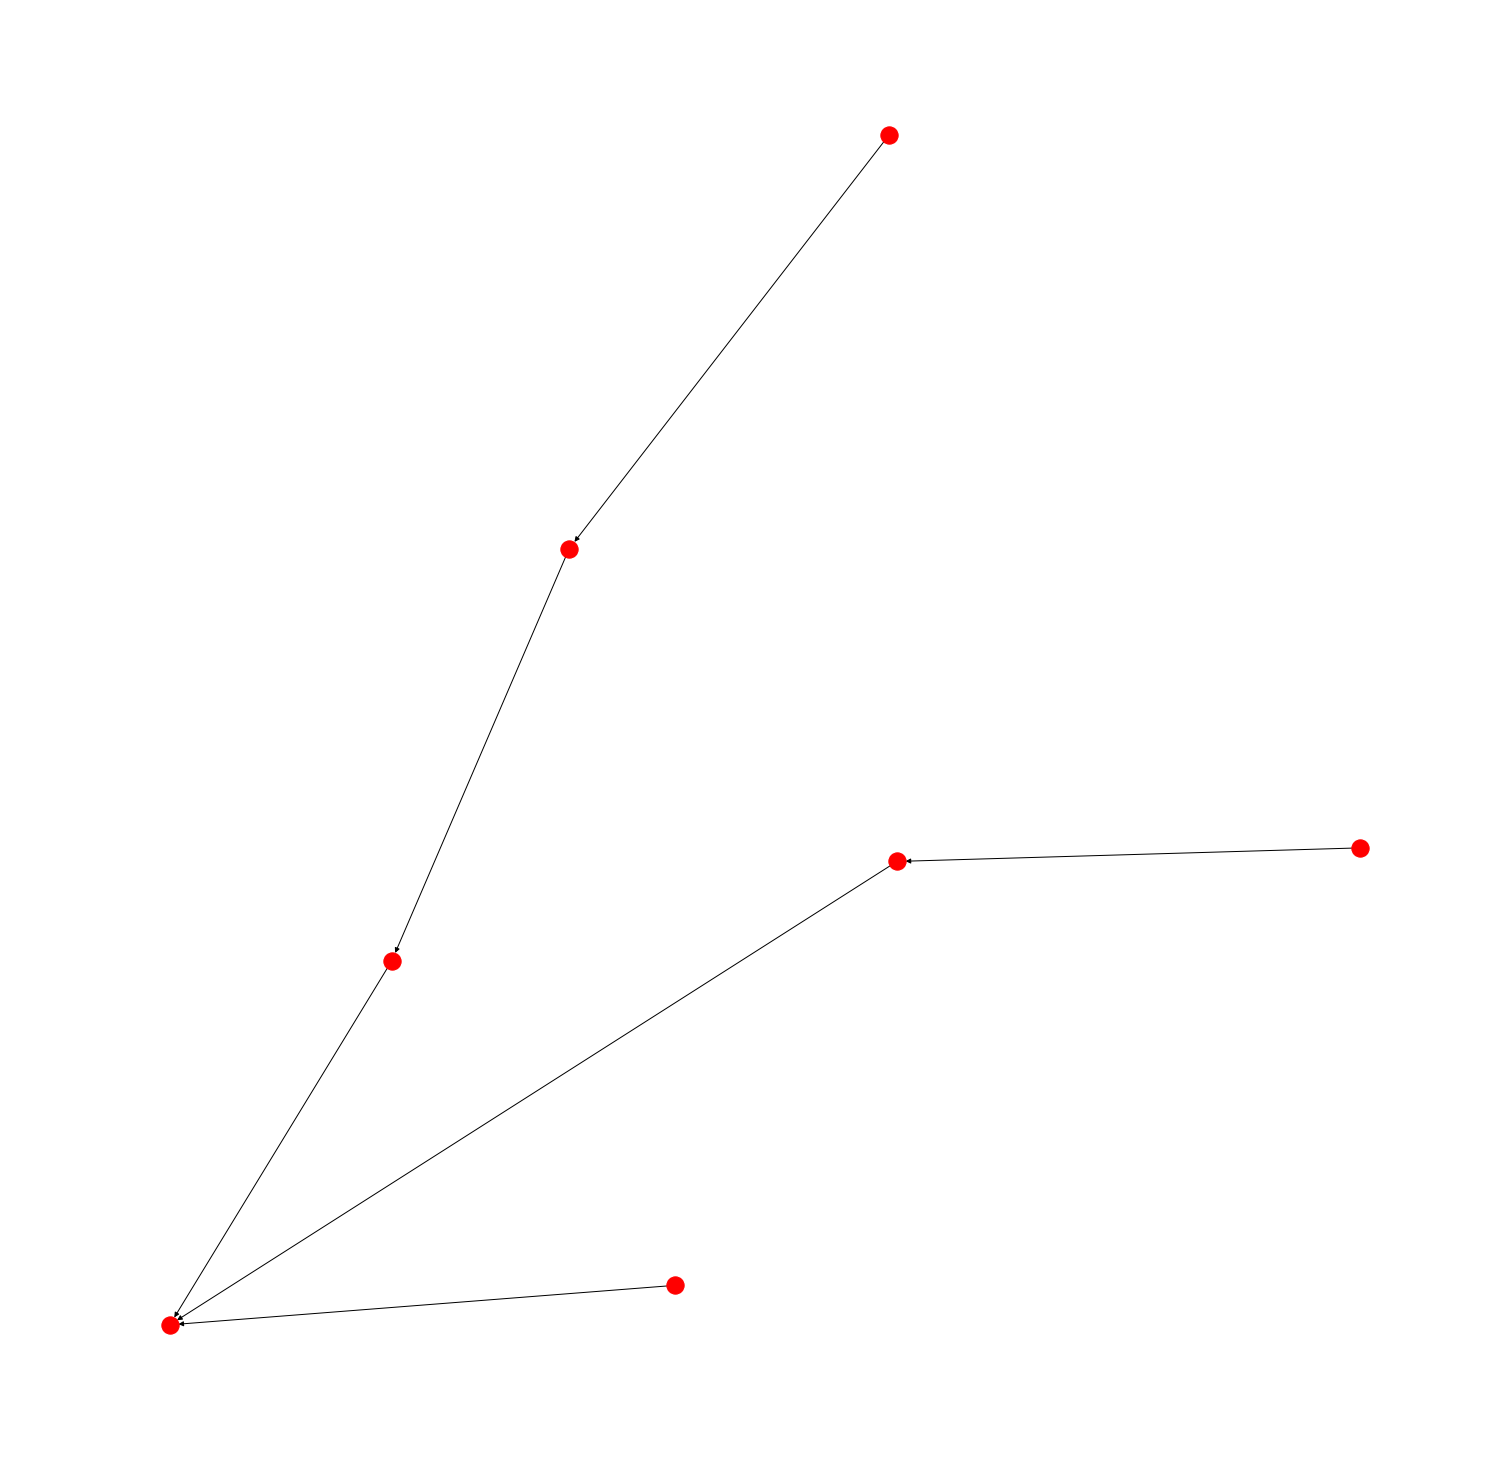

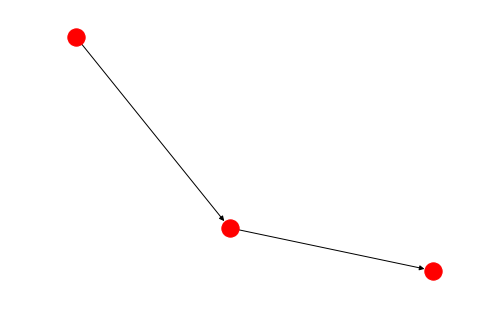

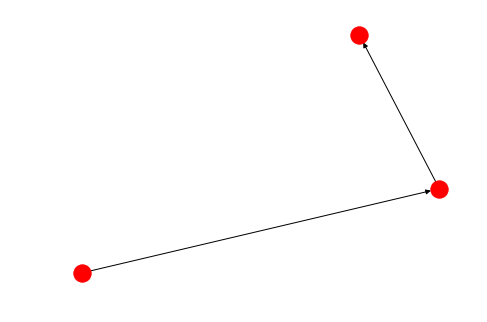

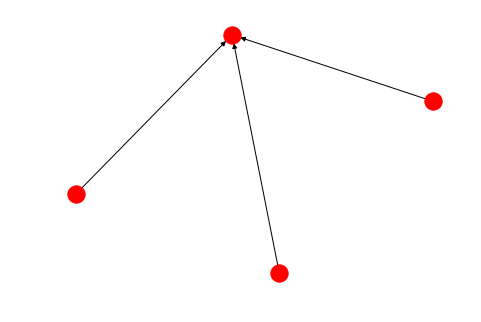

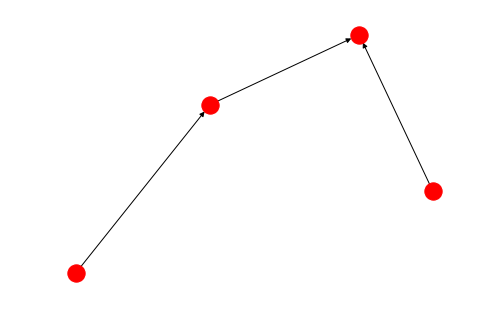

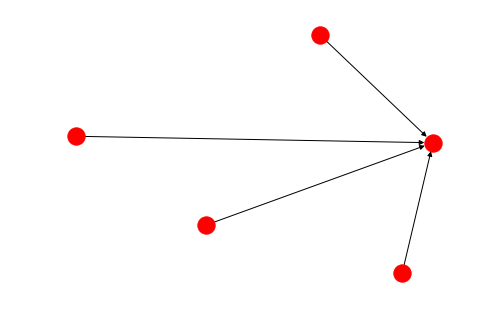

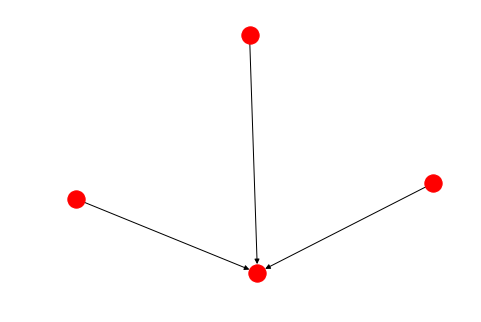

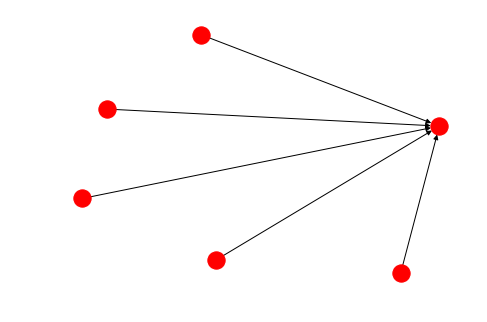

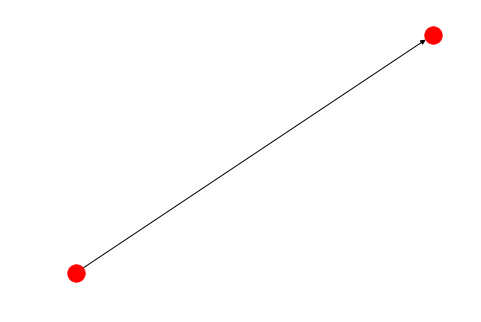

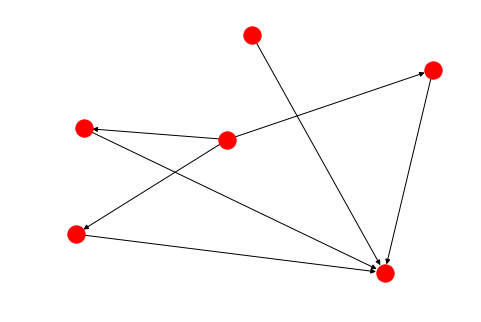

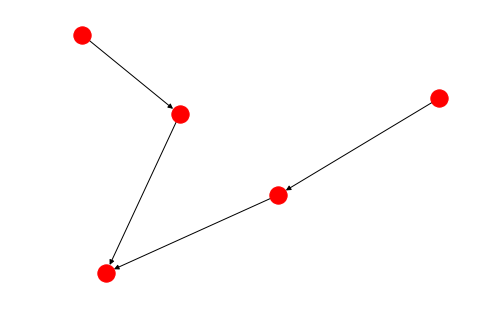

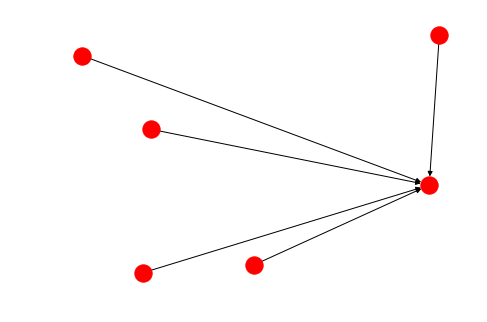

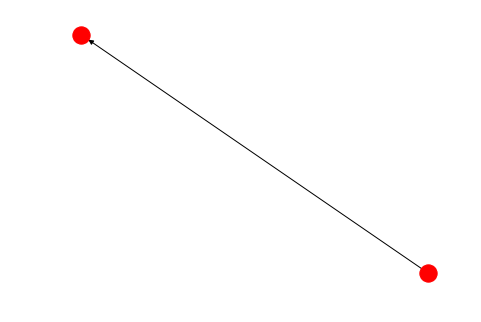

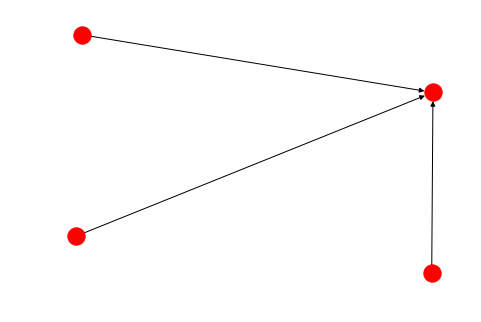

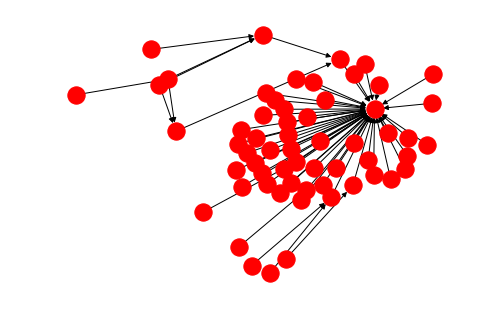

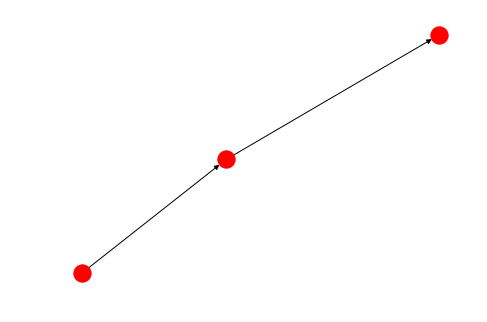

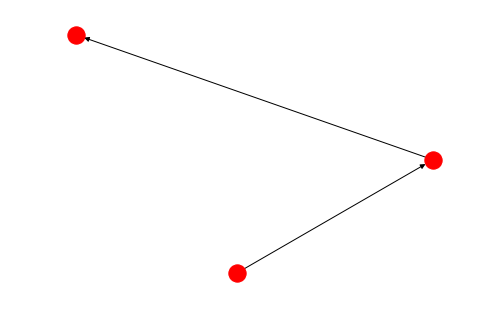

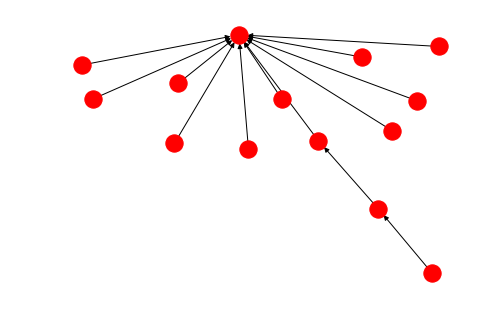

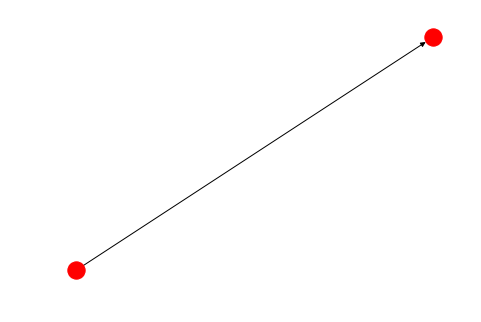

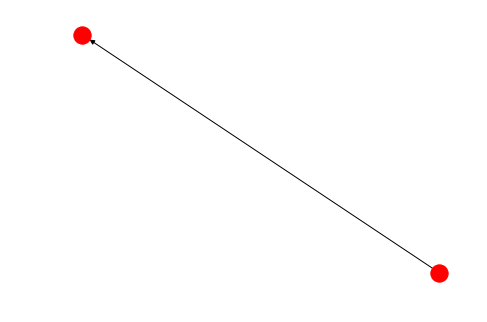

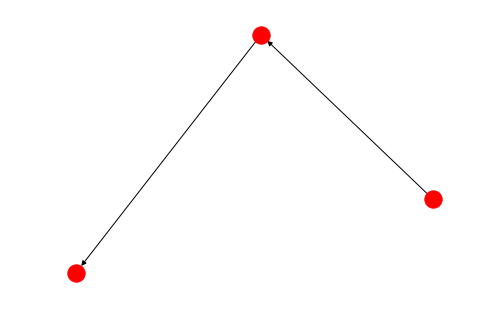

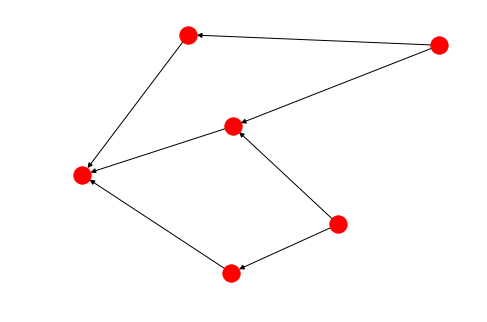

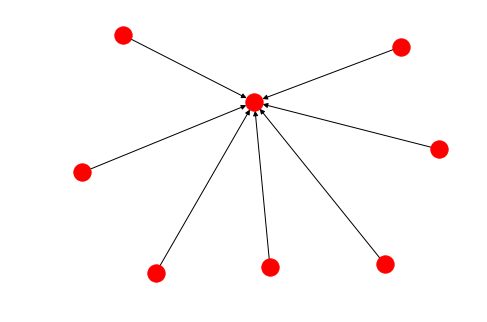

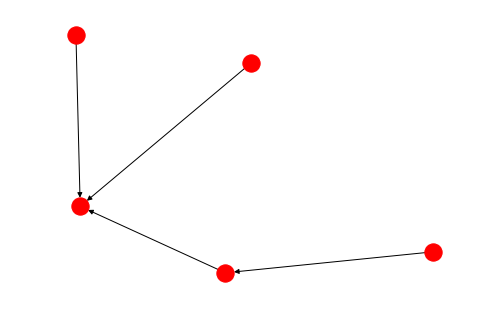

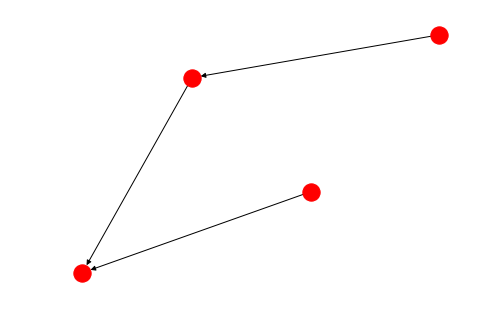

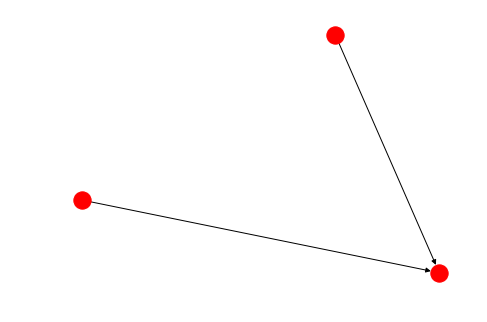

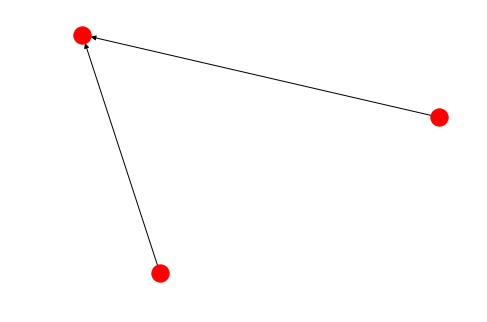

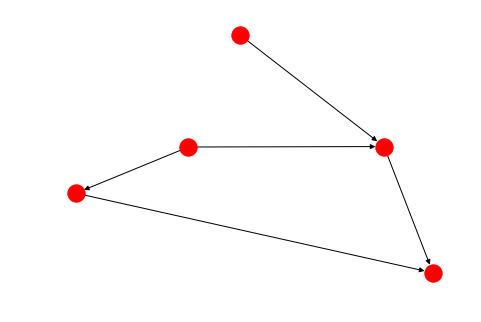

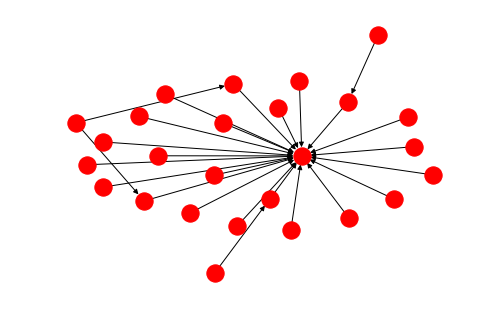

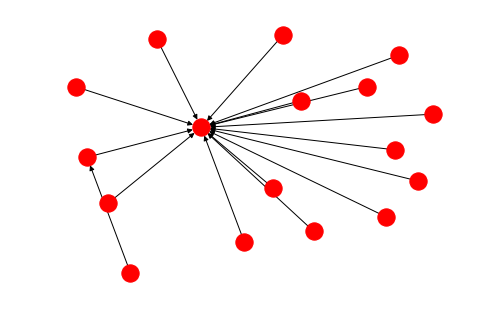

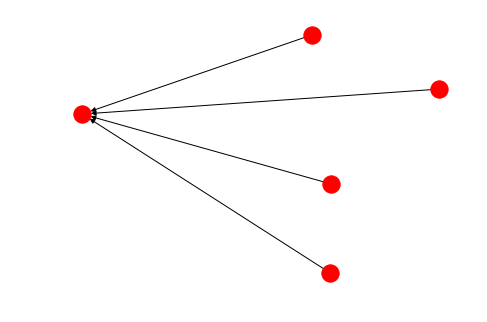

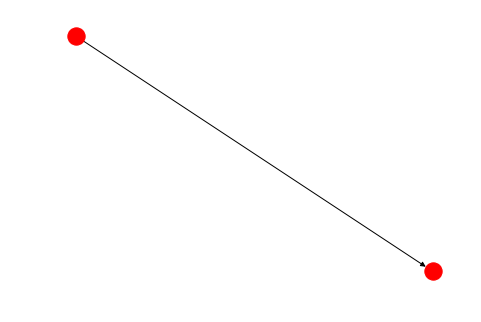

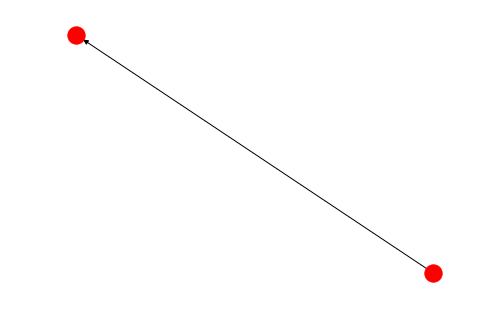

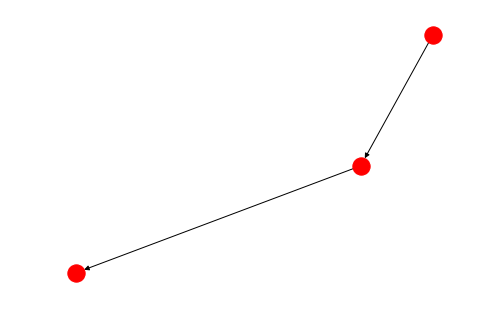

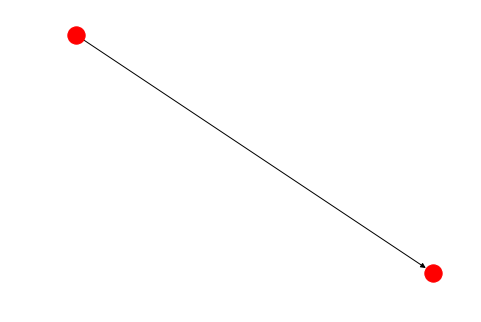

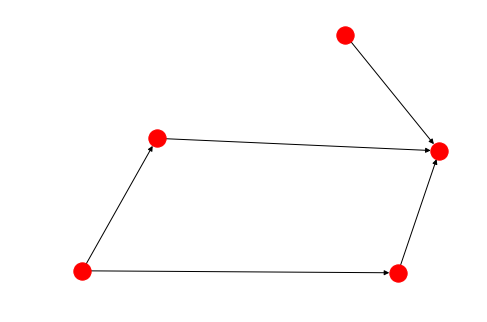

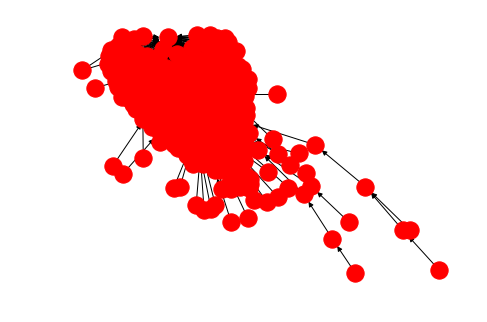

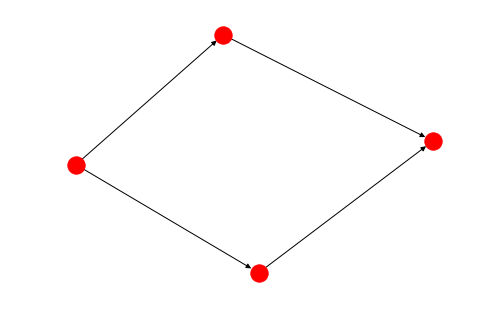

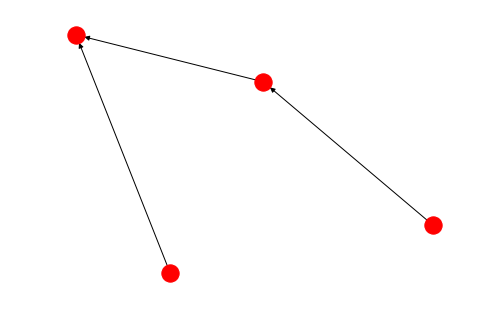

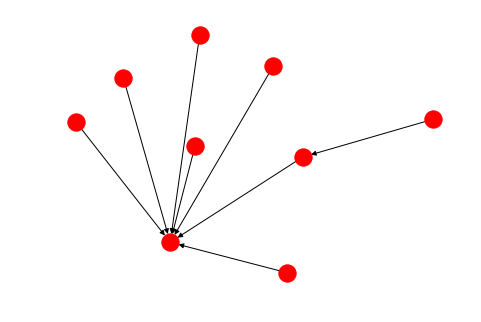

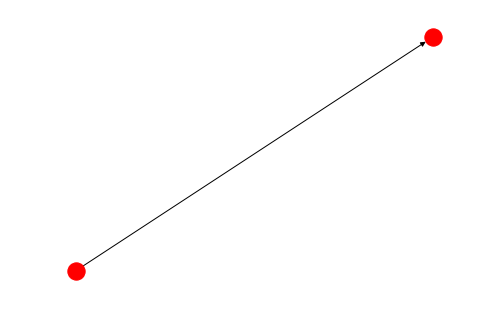

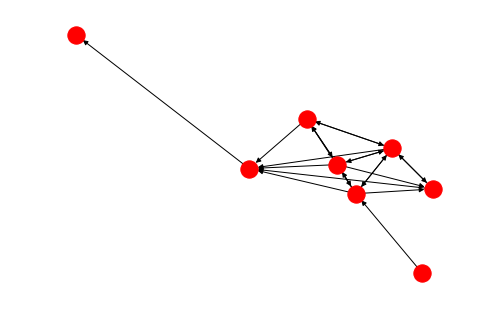

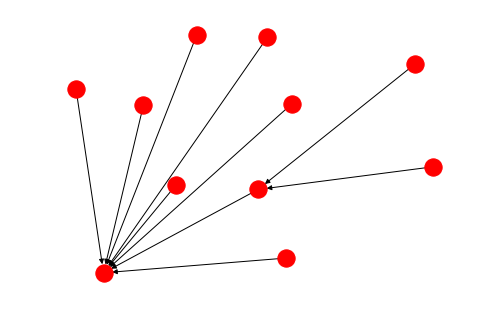

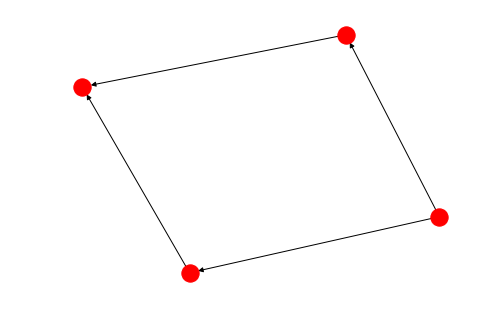

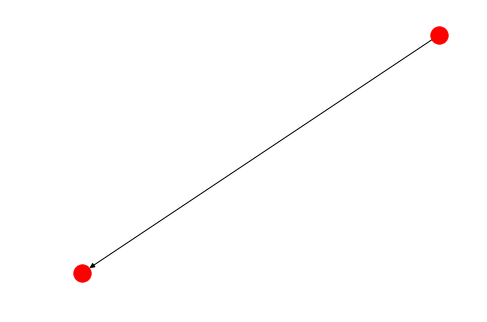

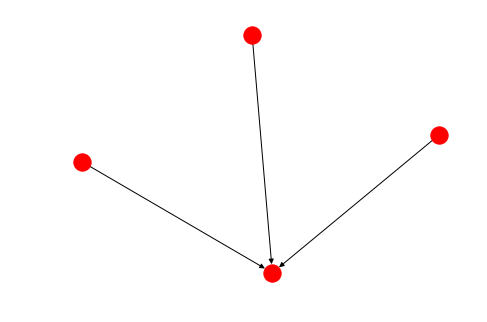

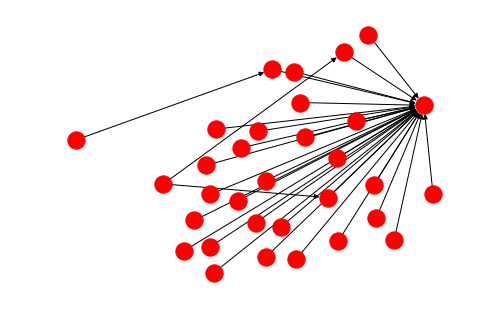

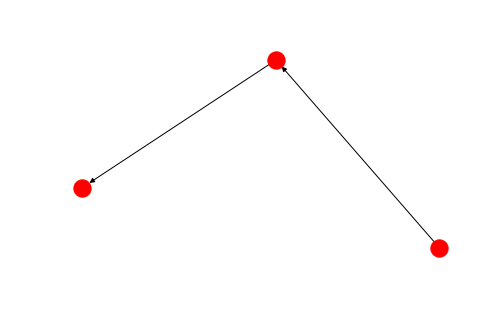

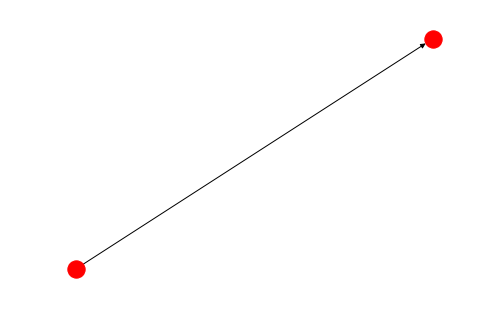

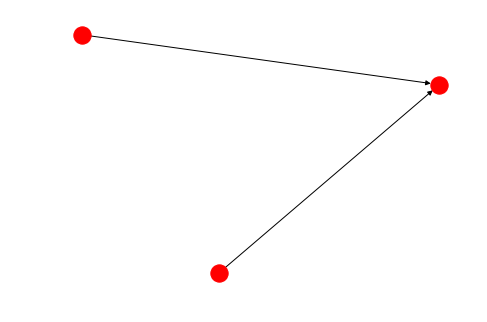

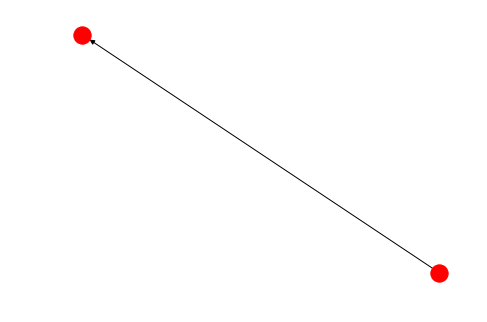

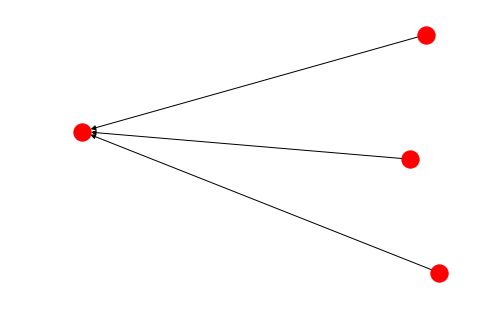

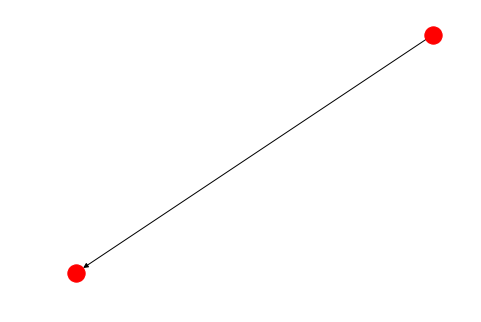

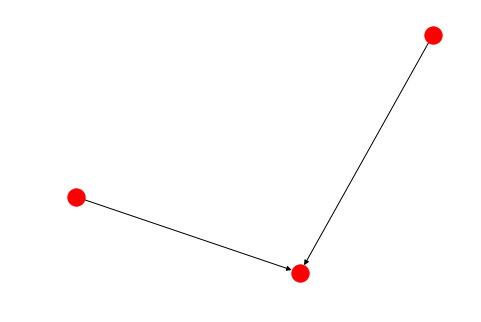

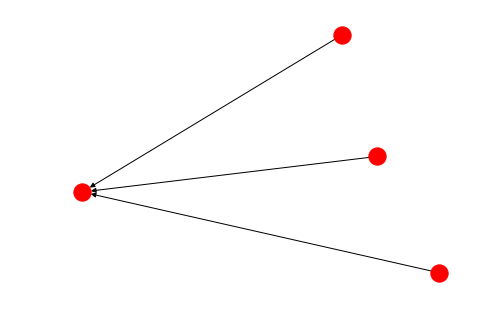

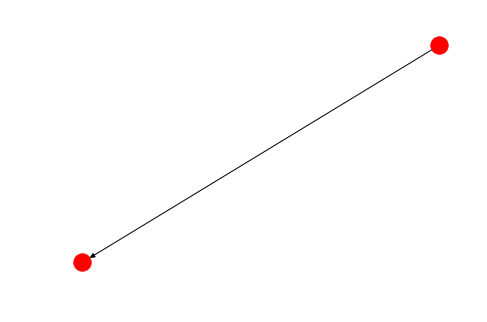

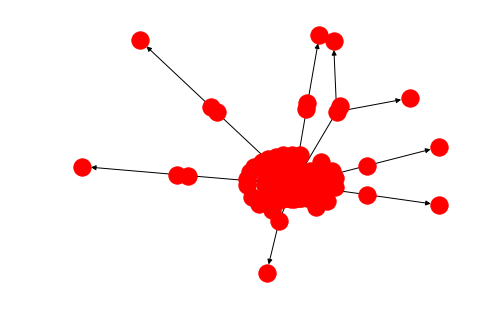

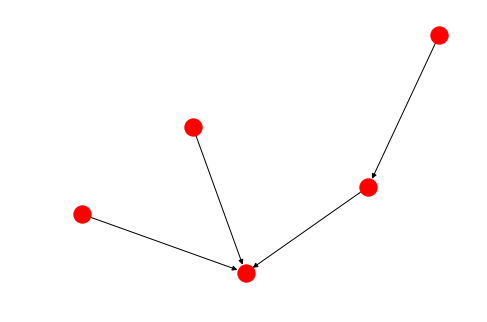

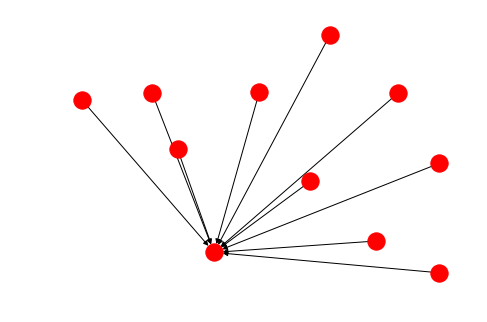

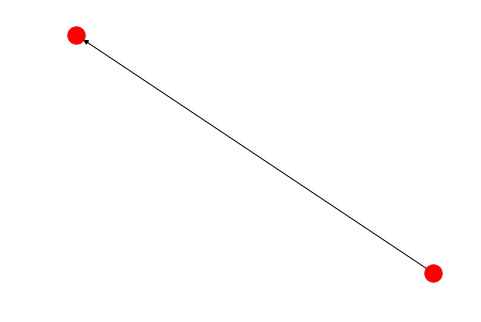

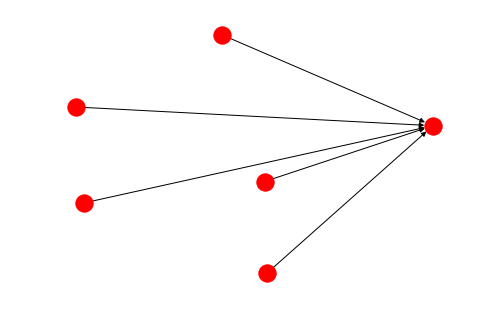

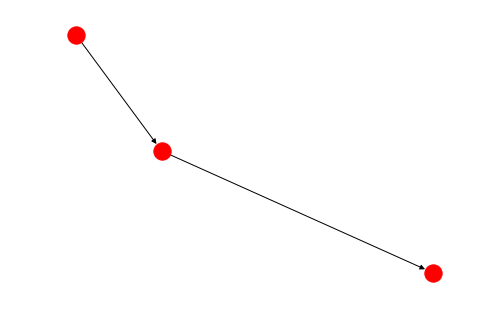

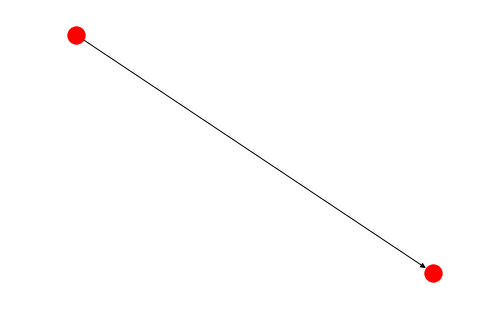

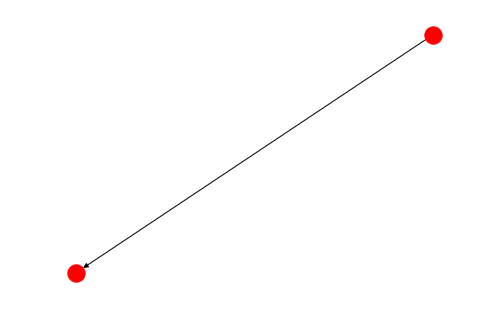

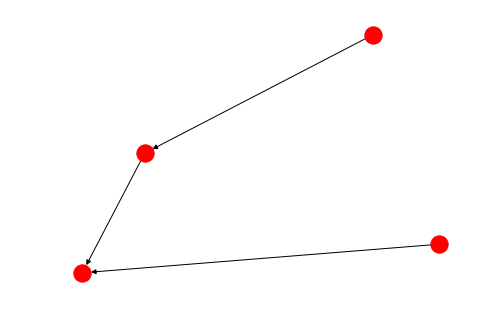

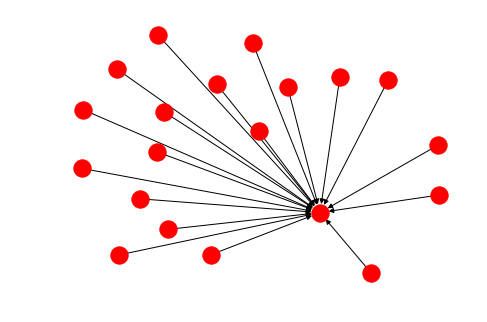

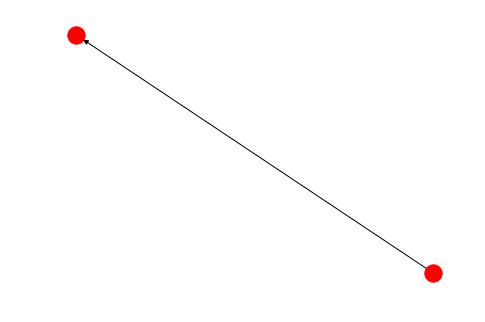

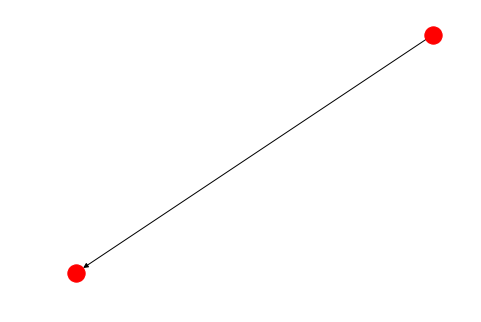

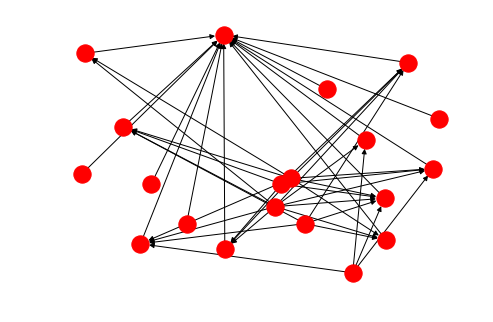

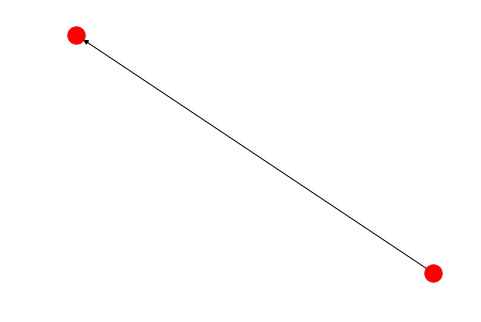

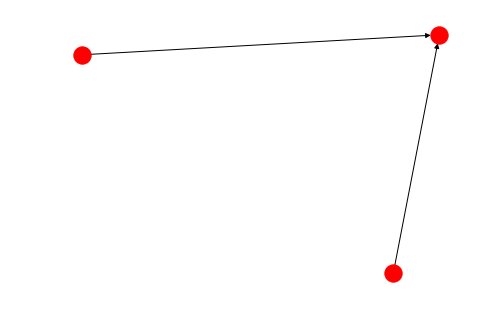

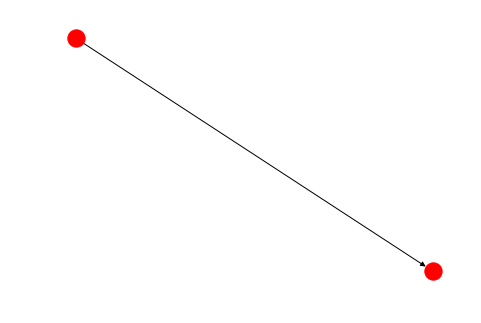

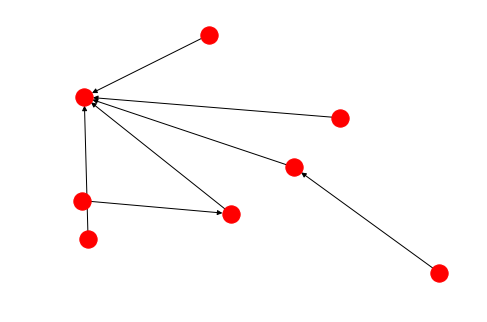

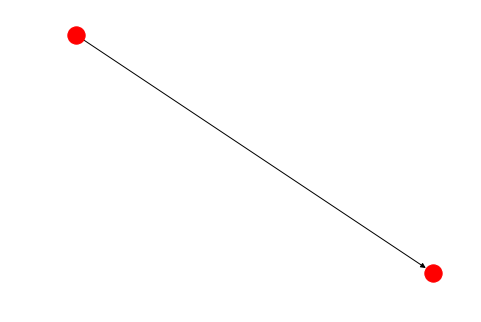

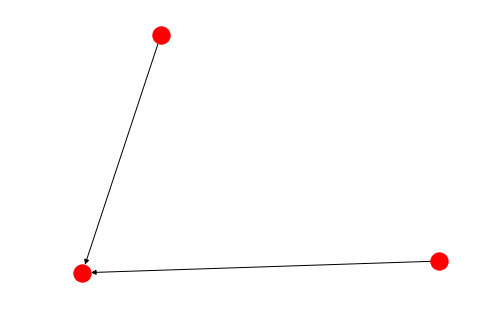

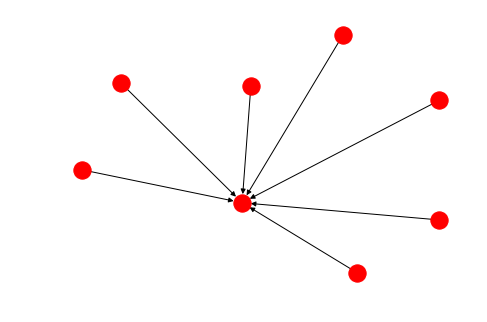

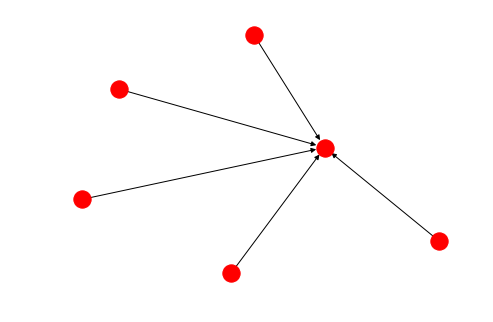

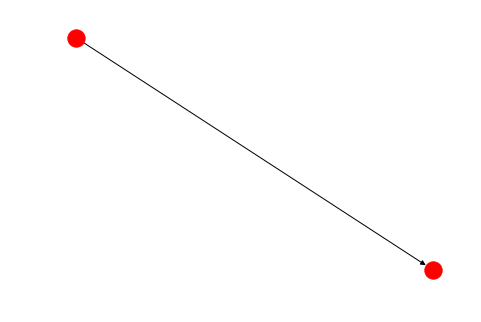

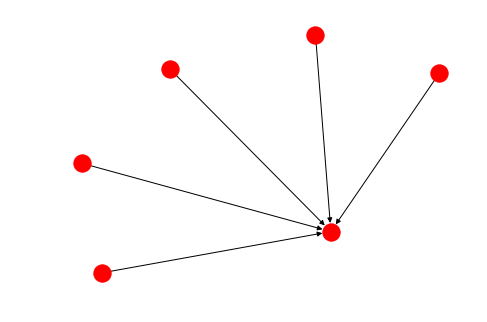

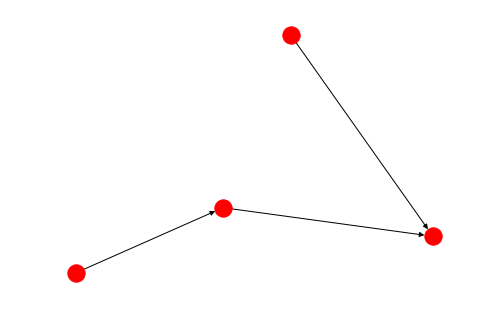

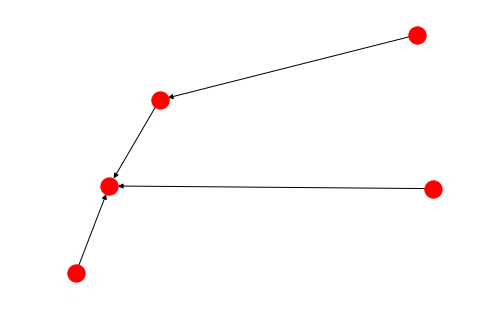

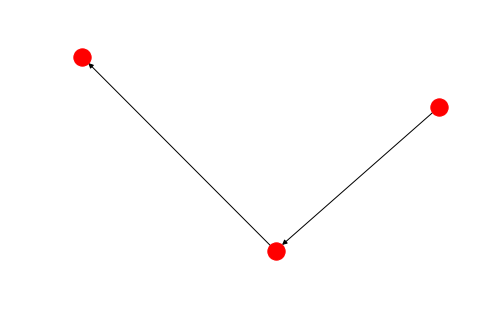

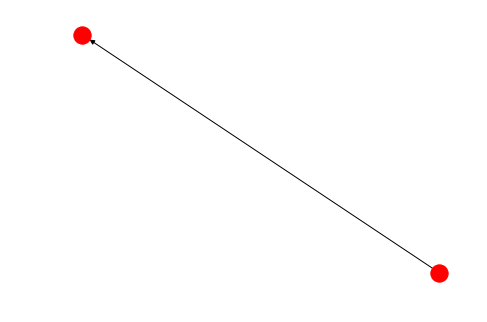

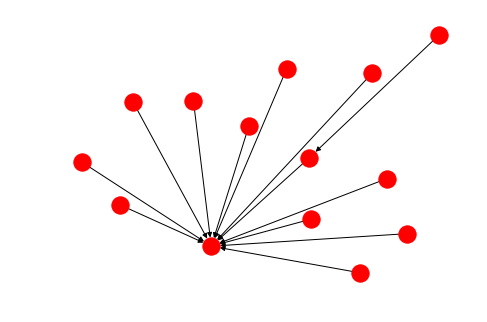

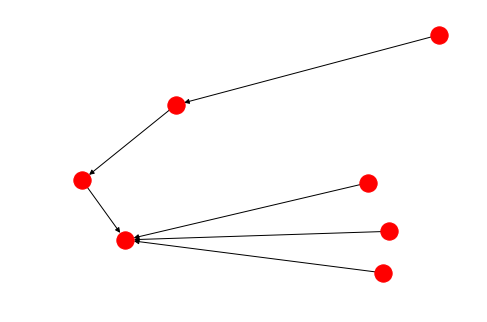

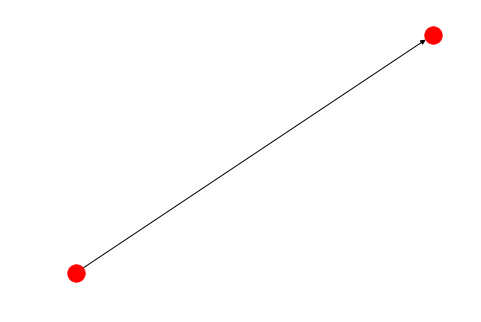

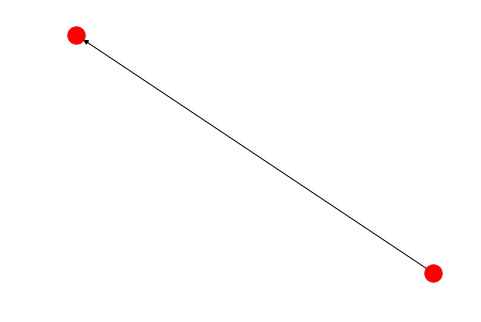

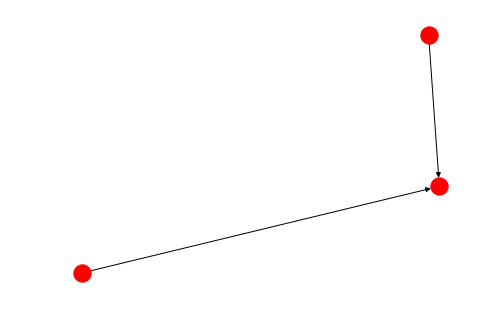

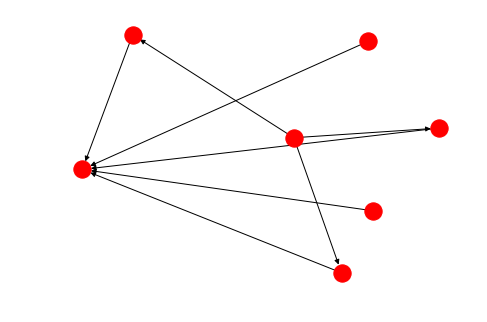

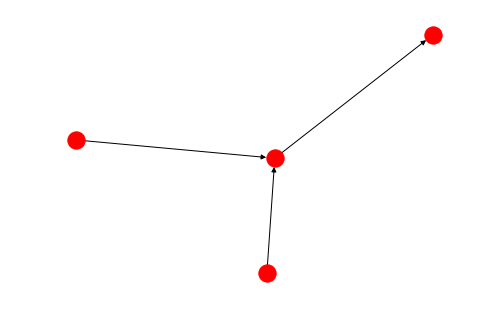

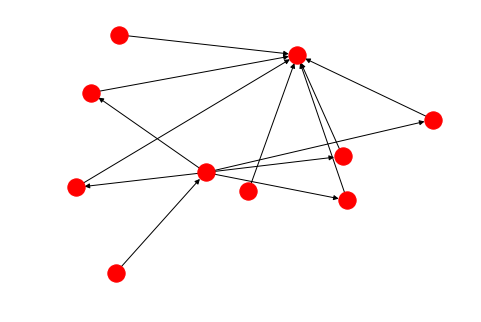

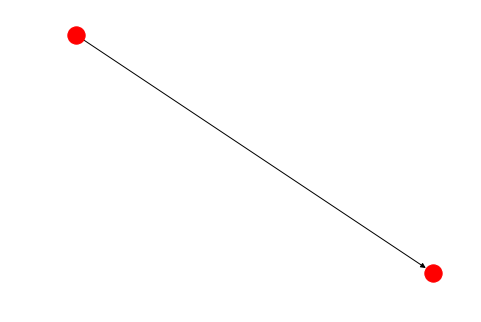

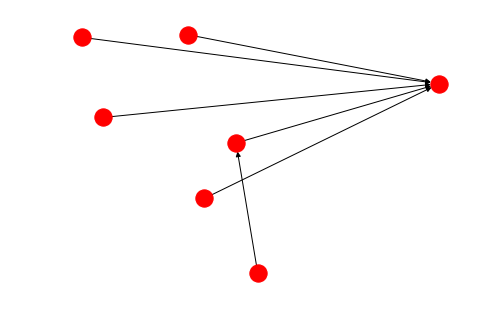

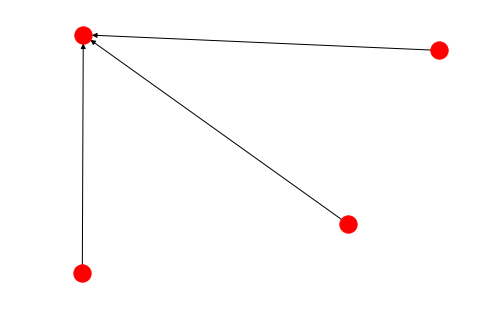

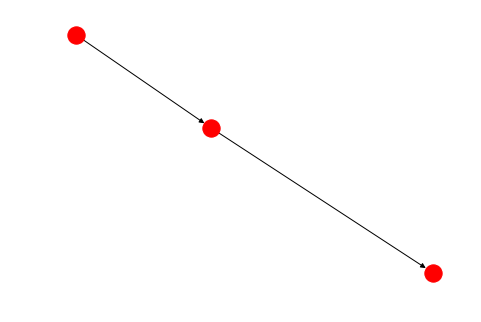

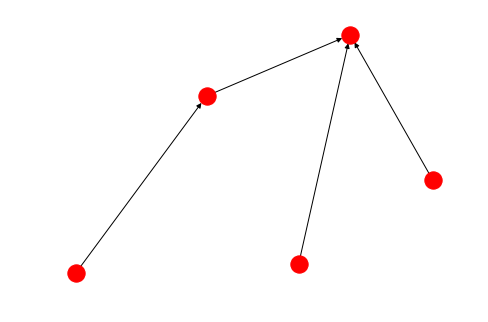

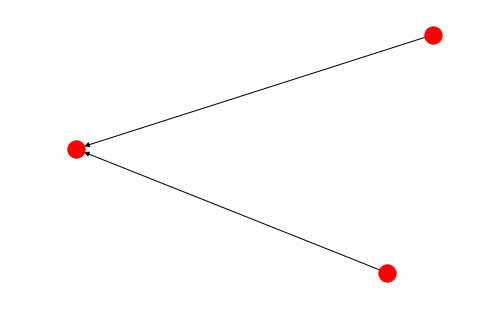

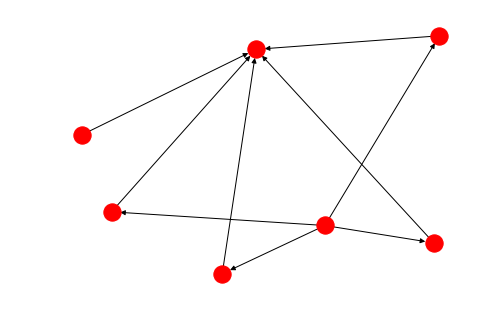

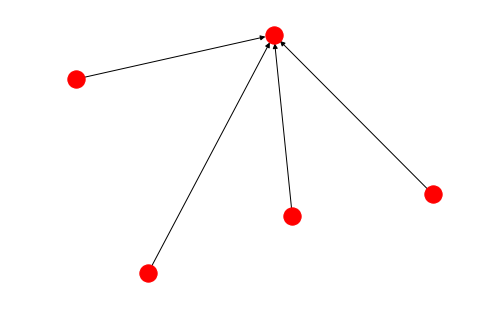

In [430]:
plt.figure(figsize=(20,20))
for idx,file in enumerate(filenames):
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    nx.draw(G)
    plt.show()

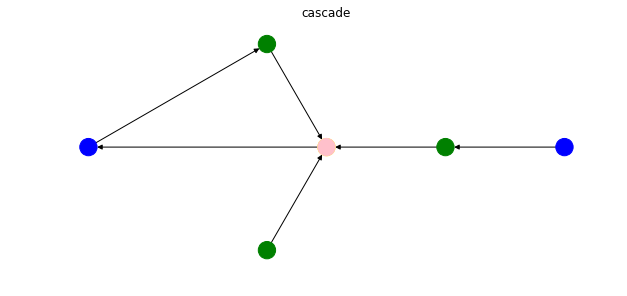

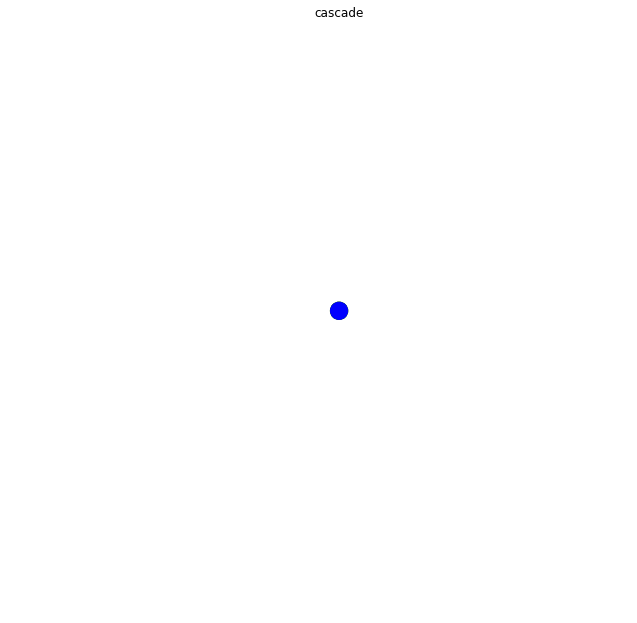

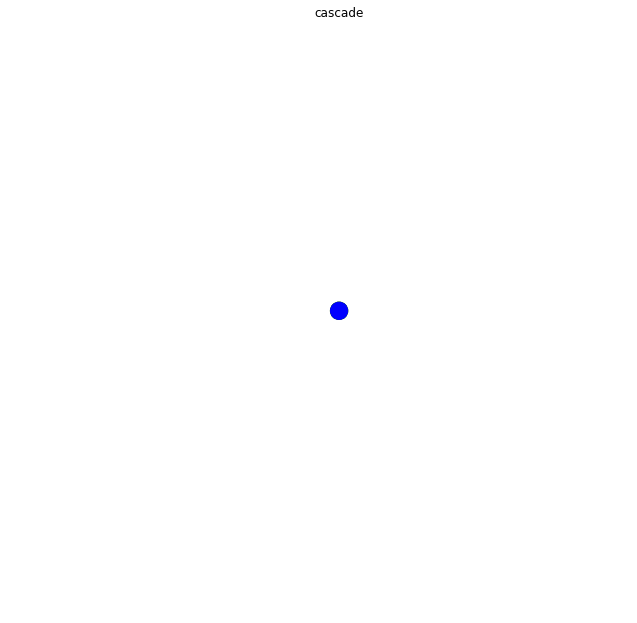

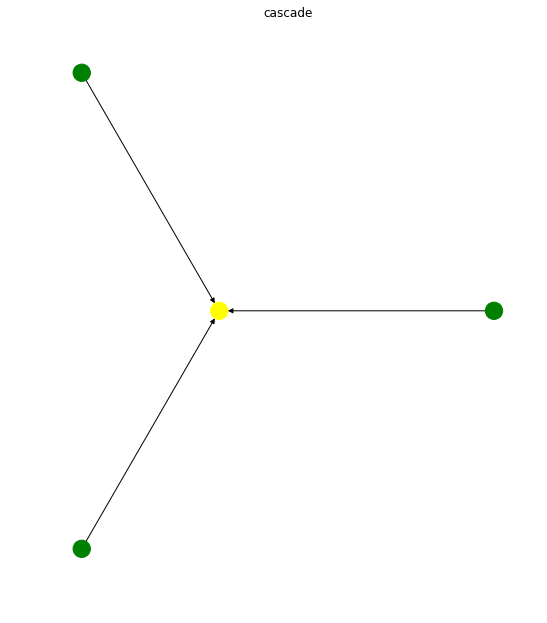

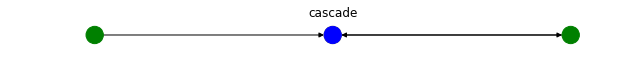

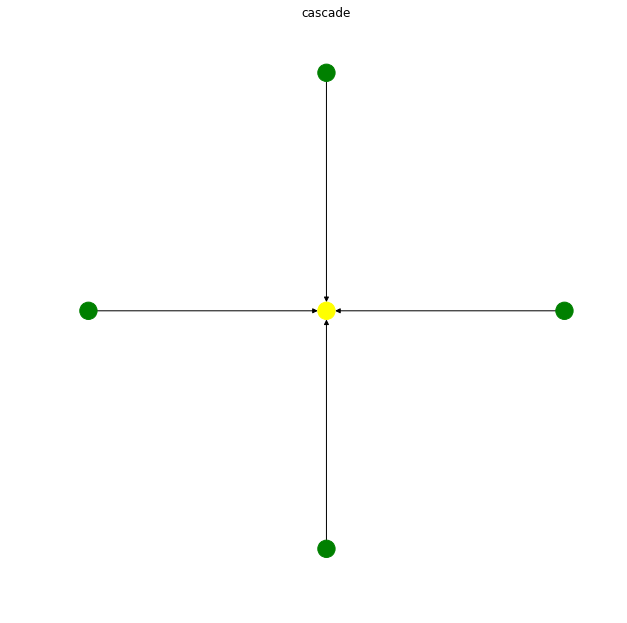

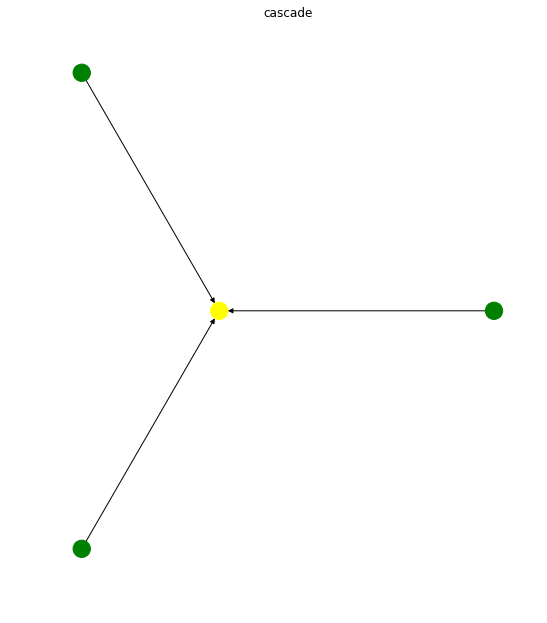

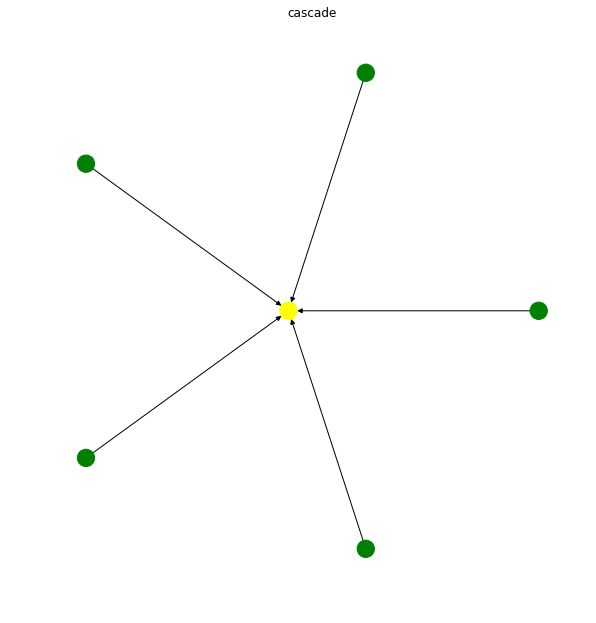

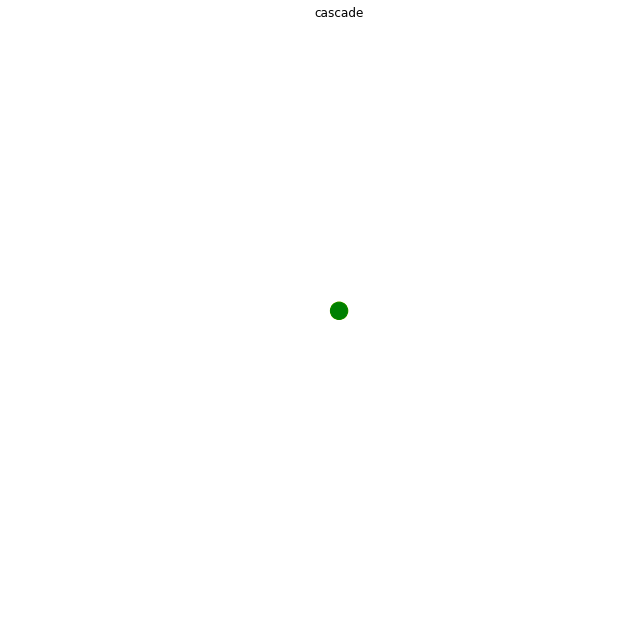

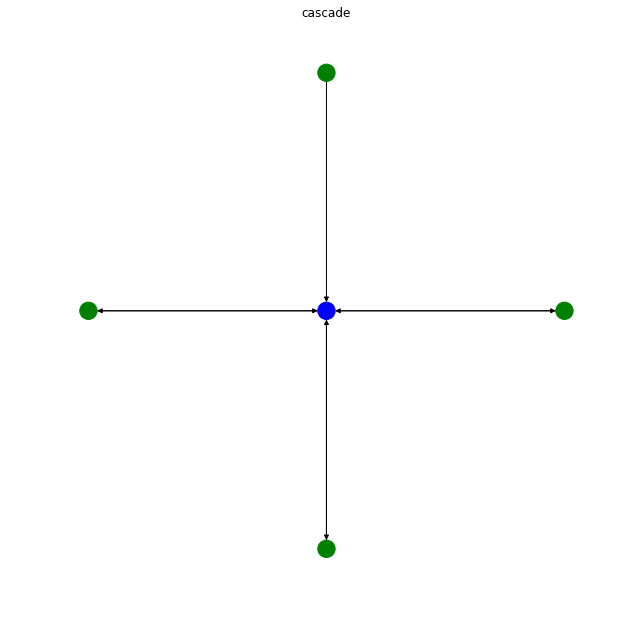

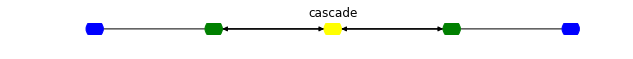

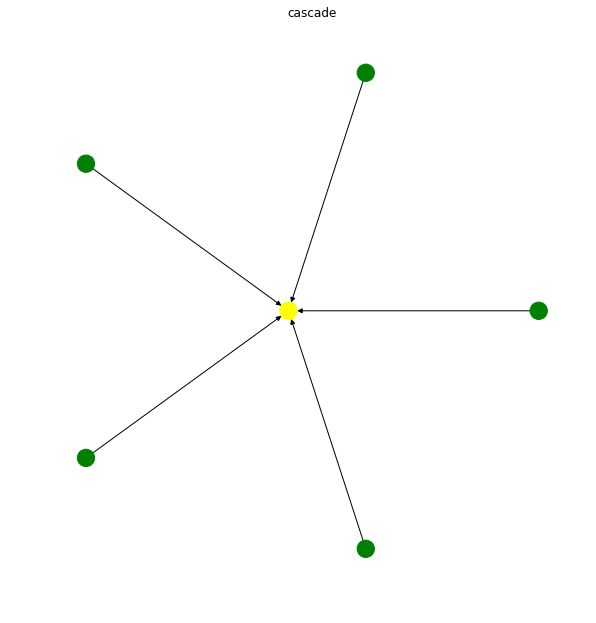

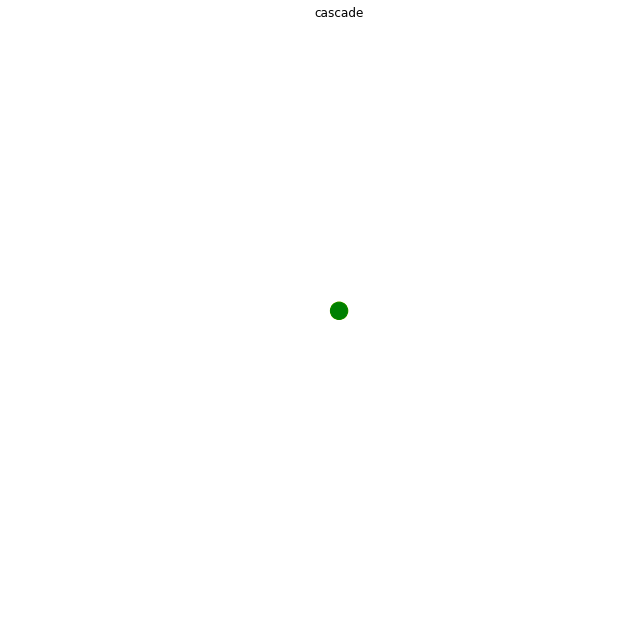

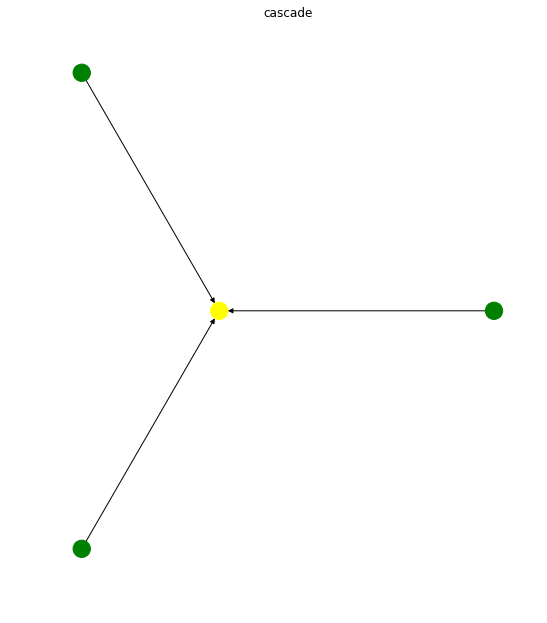

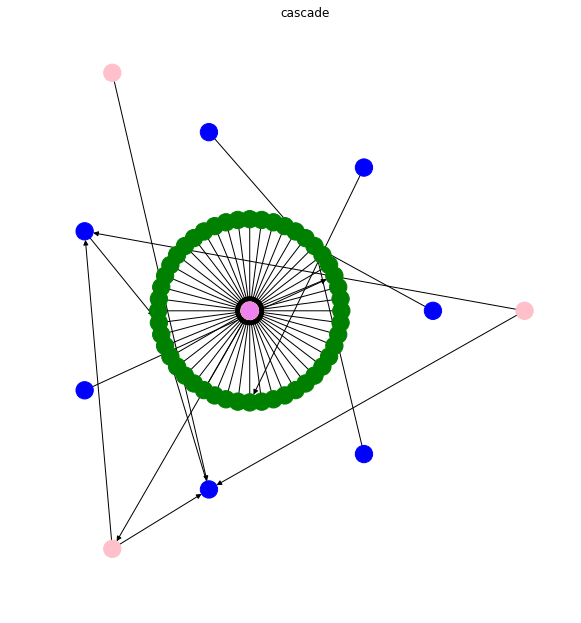

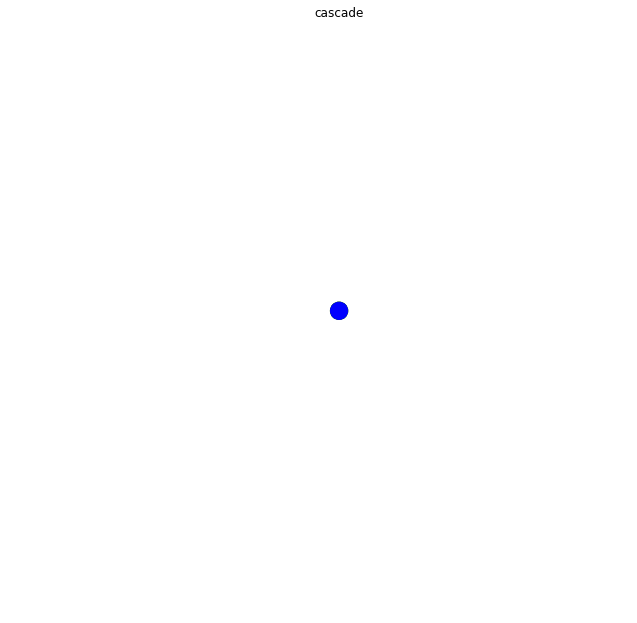

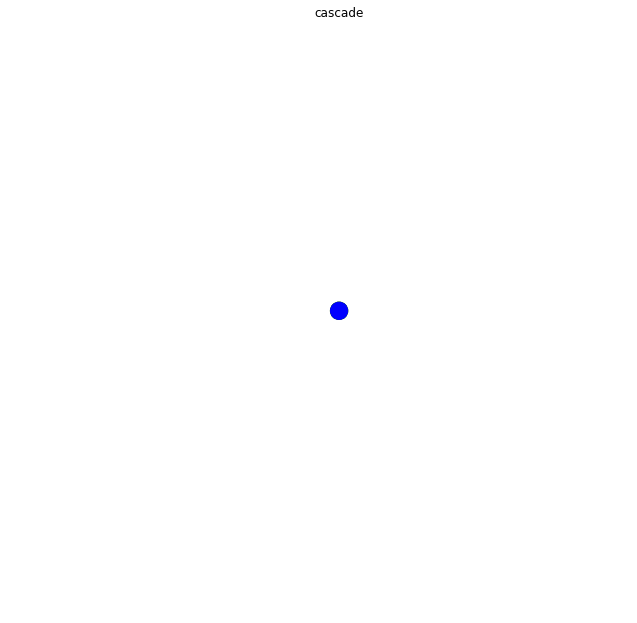

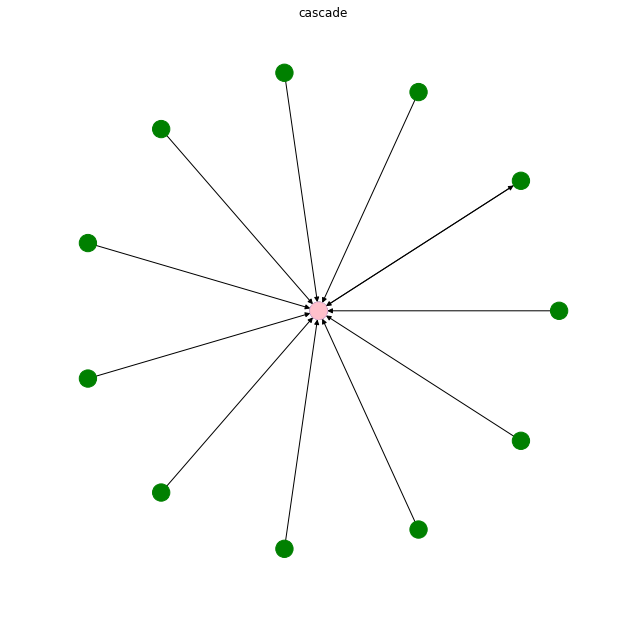

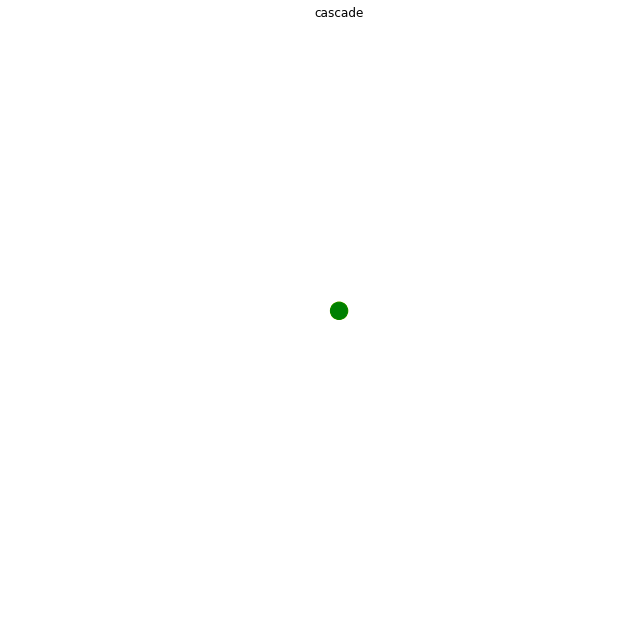

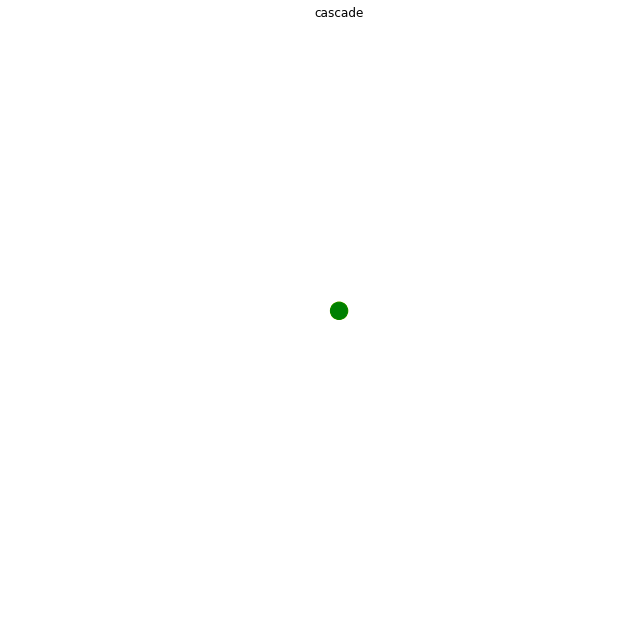

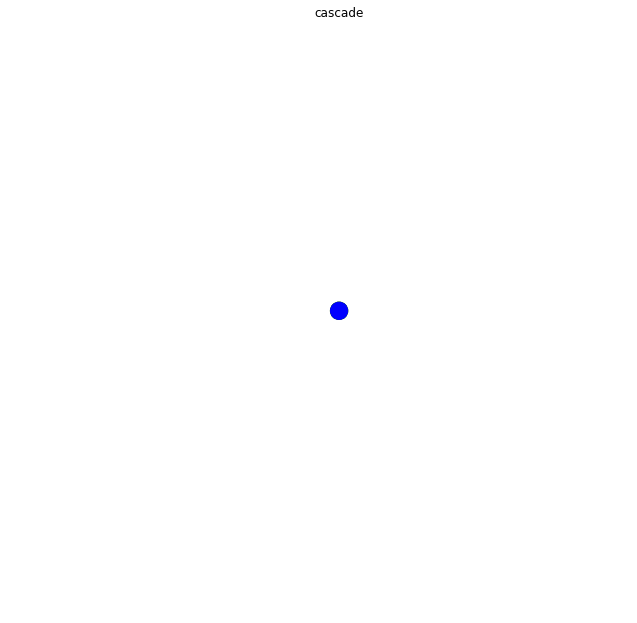

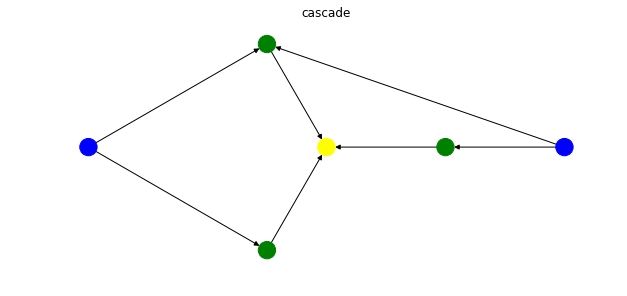

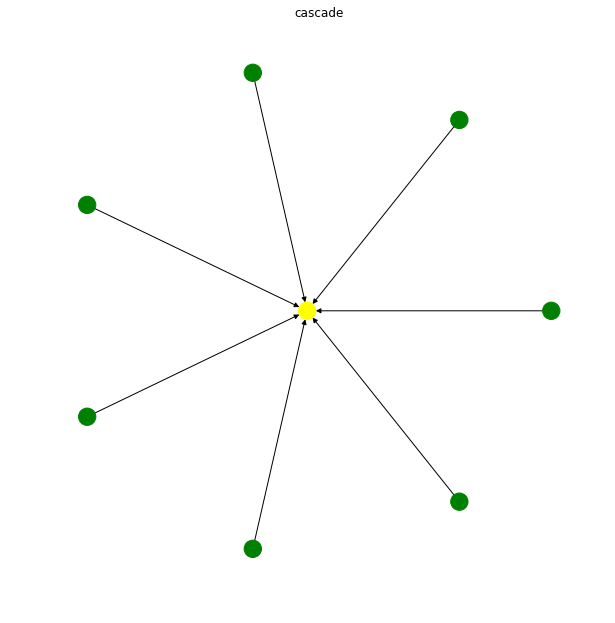

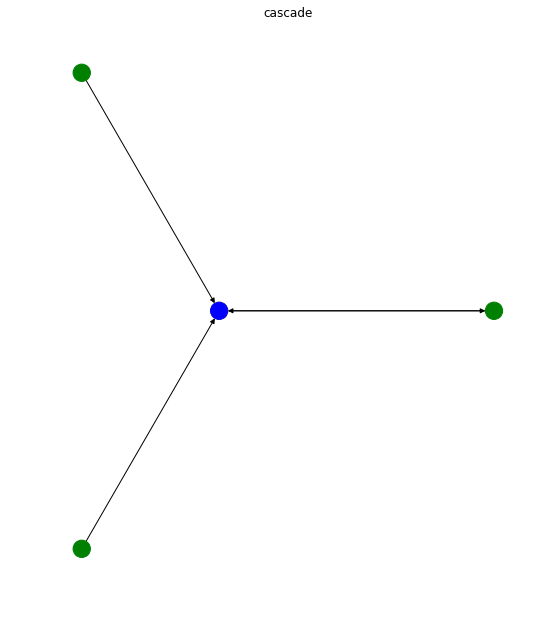

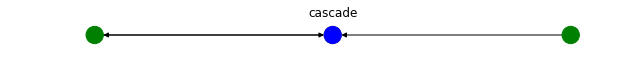

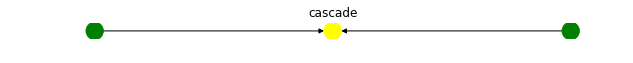

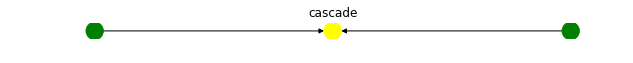

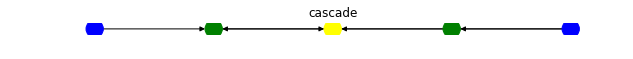

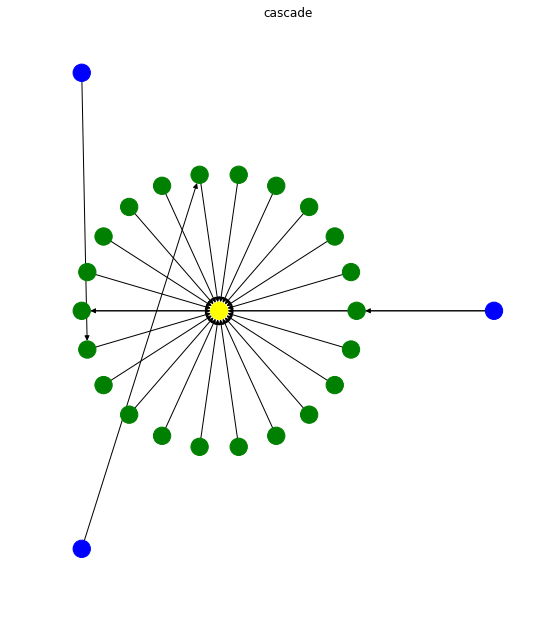

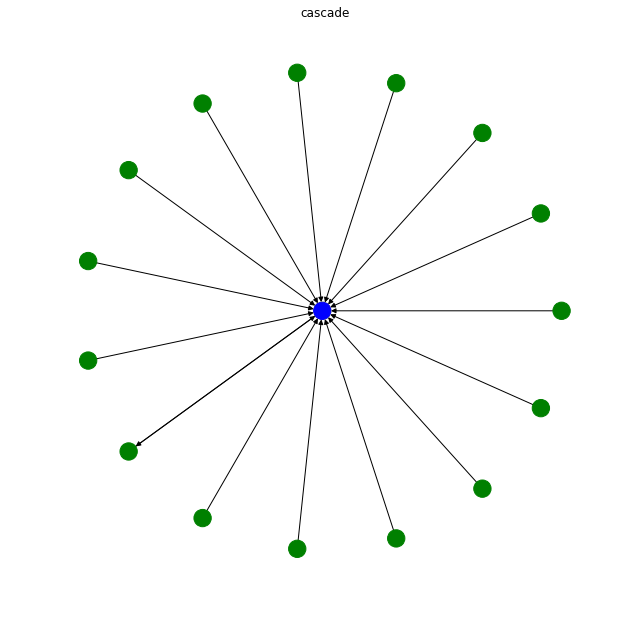

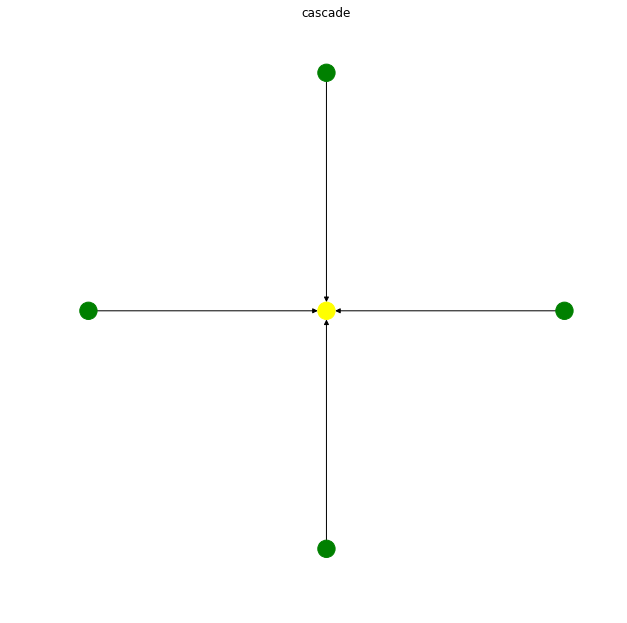

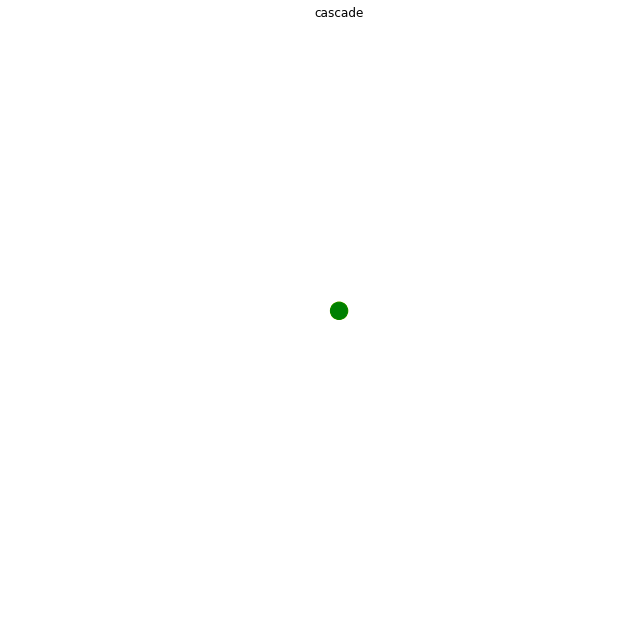

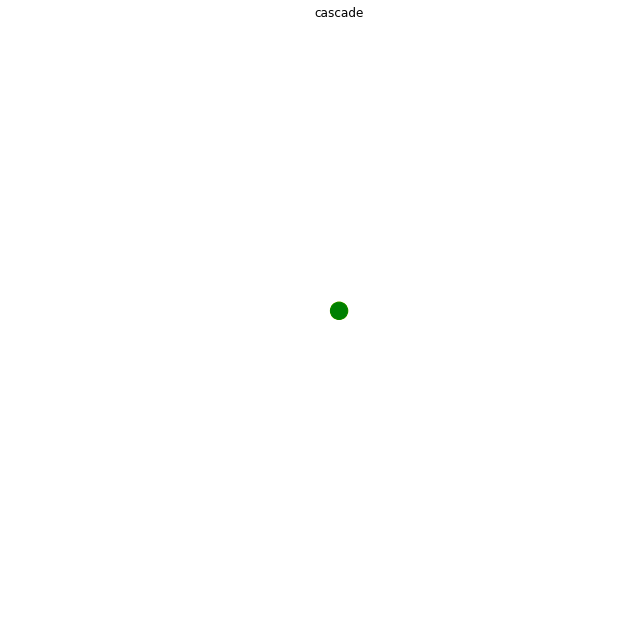

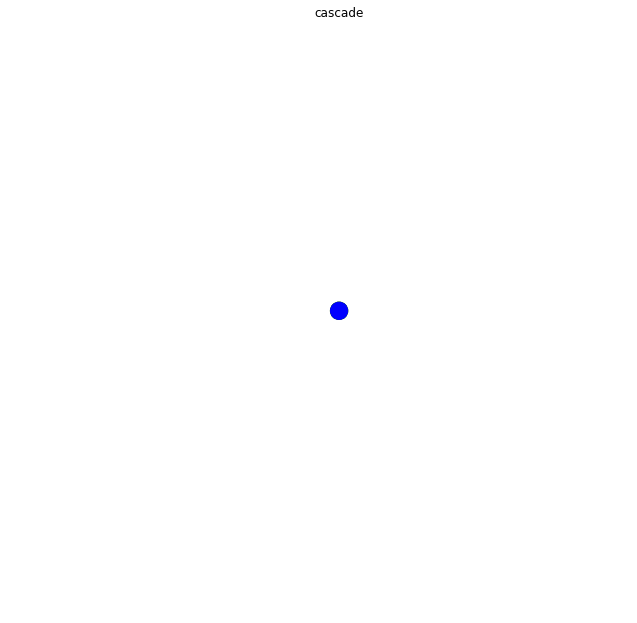

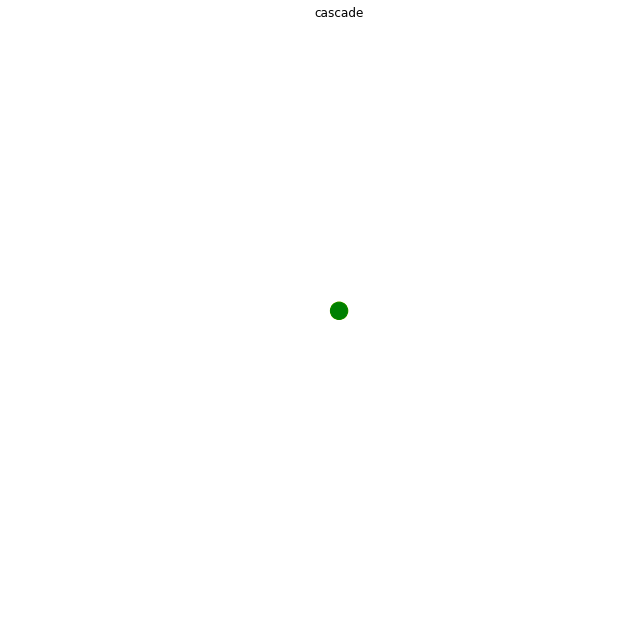

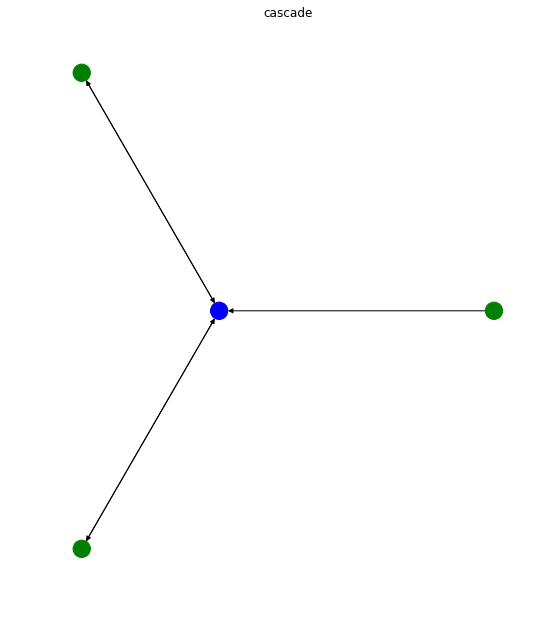

IndexError: list index out of range

<Figure size 576x576 with 0 Axes>

In [424]:
for idx,file in enumerate(filenames):
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    plot(G)

In [20]:
import operator
def get_depth(G):
    level = nx.get_node_attributes(G,'level')
    if not level:
        level = nx.get_node_attributes(G,'depth')
    depth = max(level.items(), key=operator.itemgetter(1))[1]
    return depth

In [21]:
## return fraction of nodes at each depth
def get_fraction_nodes_depth(G):
    nodes_depth = nx.get_node_attributes(G,'level')
    if (not nodes_depth):
        nodes_depth = nx.get_node_attributes(G,'depth')
    depth_nodes = list()
    depth = 0
    for depth in np.arange(10):
        if(len([k for k,v in nodes_depth.items() if v == depth])):
            depth_nodes.append(len([k for k,v in nodes_depth.items() if v == depth]))
            depth +=1
        else:
            depth_nodes.append(0)
    total_nodes = np.sum(depth_nodes)
    fraction_nodes_depth = list()
    for node_depth in depth_nodes:
        temp = node_depth / total_nodes
        fraction_nodes_depth.append(temp)
    return fraction_nodes_depth

In [59]:
len(filenames)

39

## get statistics

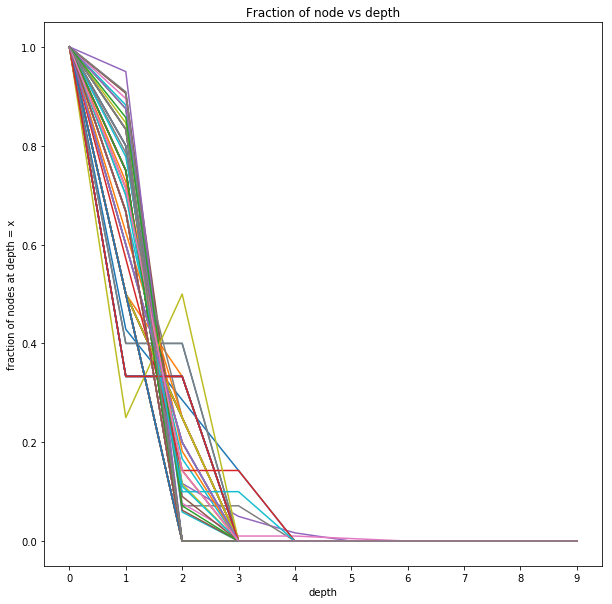

In [450]:
plt.figure(figsize=(10,10))
for file in filenames:
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    nodes_at_depth = get_fraction_nodes_depth(G)
    nodes_at_depth[0] = 1 # depth zero as start node
    plt.plot(np.arange(len(nodes_at_depth)),nodes_at_depth,label=len(G.nodes()))
    plt.xlabel("depth")
    plt.ylabel("fraction of nodes at depth = x")
    plt.xticks(np.arange(len(nodes_at_depth)))
    plt.title("Fraction of node vs depth")
# plt.legend(title="no of nodes")
plt.show()

In [79]:
len(filenames)

89

In [64]:
def get_adoption(G):
        adoption = dict()
        adopt = list()
        level = nx.get_node_attributes(G,'level')
        if not level:
            for i in range(10):
                node_s = [node for node in G.nodes if G.nodes[node]['depth'] == i]
                if (node_s):
                    for node in node_s:
                        temp = (float(G.out_degree(node)) / float(G.nodes[node]['followers'])) 
                        adopt.append(temp)
                    adoption[i] = np.mean(adopt)
                else:
                    adoption[i] = 0
        else:
            for i in range(10):
                node_s = [node for node in G.nodes if G.nodes[node]['level'] == i]
                if (node_s):
                    for node in node_s:
                        temp = (float(G.out_degree(node)) / float(G.nodes[node]['followers']))
                        adopt.append(temp)
                    adoption[i] = np.mean(adopt)
                else:
                    adoption[i] = 0
        return(adoption)

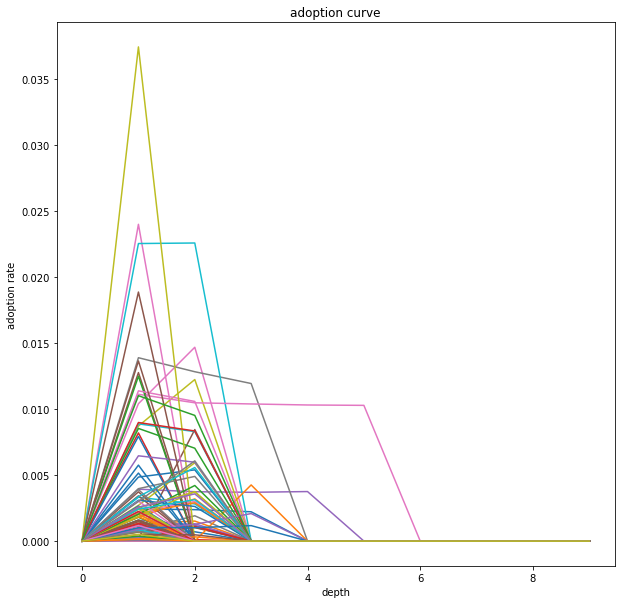

In [433]:
plt.figure(figsize=(10,10))
for file in filenames:
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    adoption = get_adoption(G)
    plt.plot(adoption.keys(),adoption.values(),label=(len(G.nodes())))
plt.xlabel("depth")
# plt.legend(title="no of nodes")
plt.ylabel("adoption rate")
plt.title("adoption curve")
plt.show()

<Figure size 360x360 with 0 Axes>

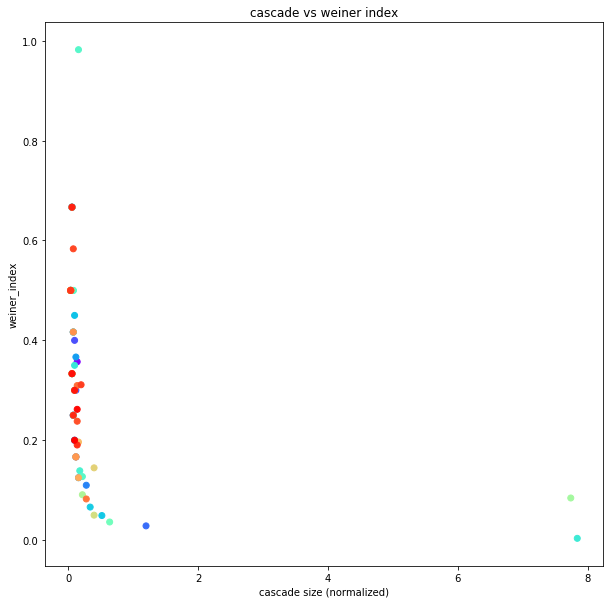

In [437]:
# the graph should be between size vs weiner index (size represented in log level)
import matplotlib.cm as cm
import math
plt.figure(figsize=(5,5))
size = list()
weiner_index_l = list()
for file in filenames:
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    depth = get_depth(G)
    weiner_index = nx.average_shortest_path_length(G)
    size.append((len(G.nodes)/50))
    weiner_index_l.append(weiner_index)
plt.figure(figsize=(10,10))
plt.xlabel("cascade size (normalized)")
plt.ylabel("weiner_index")
plt.title("cascade vs weiner index")
colors = cm.rainbow(np.linspace(0, 1, len(weiner_index_l)))
plt.scatter(size,weiner_index_l,color=colors)
plt.xticks([i for i in np.arange(0,10,2)])
plt.show()

In [43]:
def search(elapse_list,element):
    for idx,ele in enumerate(elapse_list):
        if ele > element:
            return idx
    return (len(elapse_list))

## cascade history

In [44]:
def get_time_series(times,total_time):
    elapsed = list()
    for i in range(len(times)):
        temp = times[i] - times[0]
        elapsed.append(temp.total_seconds())
    time_s = dict()
    time_s[0] = 0
    for i in np.arange(2,12,2):
        time_l = ((i * total_time) / 10)
        pos = search(elapsed,time_l)
        time_s[i] = pos / len(elapsed)
    return(time_s)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


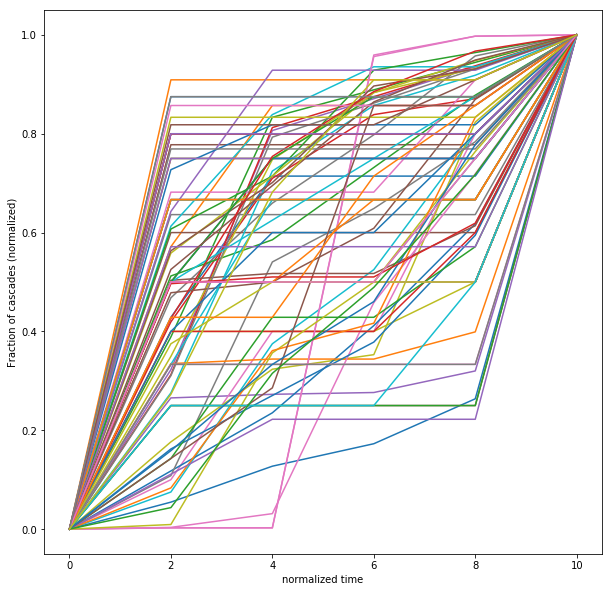

In [436]:
plt.figure(figsize=(10,10))
for file in filenames:
    cascade = pd.DataFrame()
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    cascade = pd.DataFrame()
    for node in G.nodes:
        temp = hexagon_data.loc[hexagon_data.userID == node]
        cascade = cascade.append(temp)
    df_cascade = cascade[['tweetCreatedAt','userID']]
    df_cascade['tweetCreatedAt'] = pd.to_datetime(df_cascade['tweetCreatedAt'])
    df_cascade = df_cascade.sort_values(by='tweetCreatedAt')
    time_series = list(df_cascade['tweetCreatedAt'])
    temp = df_cascade.values[-1].tolist()[0] - df_cascade.values[0].tolist()[0]
    total_time = temp.total_seconds()
    series = get_time_series(time_series,total_time)
    plt.plot(series.keys(),series.values(),label= len(G.nodes()))
# plt.legend(title="no of nodes")
plt.xlabel("normalized time")
plt.ylabel("Fraction of cascades (normalized)")
plt.show()

## mutual friends ccdf (with different depths)

In [441]:
def get_mutual_friends(mutual_friends,friends_data,G):
    for nodeA in tqdm(G.nodes()):
        for nodeB in (G.nodes()):
            friendsA = None
            friendsB = None
            if int(nodeA) in set(list(friends_data.userID)):
                friendsA = ast.literal_eval(list(friends_data.following.loc[friends_data.userID == int(nodeA)])[0])
                if int(nodeB) in set(list(friends_data.userID)):
                    friendsB = ast.literal_eval(list(friends_data.following.loc[friends_data.userID == int(nodeB)])[0])
                    if (friendsA and friendsB):
                        if (set(friendsA).intersection(set(friendsB))):
                            friends_m = (set(friendsA).intersection(set(friendsB)))
                            if(friends_m):
                                mutual_friends = update_dict(len(friends_m),mutual_friends)
                            else:
                                friends_m = 0
    return mutual_friends

In [322]:
def update_dict(element,dict_):
    for key,value in dict_.items():
        if element >= key:
            dict_[key] += 1
    return(dict_) # return updated dictioary

In [418]:
def normalized_dict(dict_):
    total = dict_[0]
    for key,value in dict_.items():
        if (value):
            dict_[key] = value/total
        else:
            dict_[key] = 0
    return dict_

In [445]:
# mutual friends ccdf among pair of nodes in cascades:
mut_friends_d1 = {0:0,10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0,200:0,500:0,1000:0,}
mut_friends_d2 = {0:0,10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0,200:0,500:0,1000:0,}
mut_friends_d3 = {0:0,10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0,200:0,500:0,1000:0,}
mut_friends_d4 = {0:0,10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0,200:0,500:0,1000:0,}
count = {1:0,2:0,3:0,4:0}
for file in tqdm(filenames):
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    if  0 < len(G.nodes()) <= 50:
        mut_friends_d1 = get_mutual_friends(mut_friends_d1,friends_data,G) # get the updated dictionary
        count[1] += 1
    elif 50 < len(G.nodes()) <= 100:
        mut_friends_d2 = get_mutual_friends(mut_friends_d2,friends_data,G) # get the updated dictionary
        count[2] += 1
    elif 100 < len(G.nodes()) <= 200:
        mut_friends_d3 = get_mutual_friends(mut_friends_d3,friends_data,G) # get the updated dictionary
        count[3] += 1
    elif len(G.nodes()) > 300:
        mut_friends_d4 = get_mutual_friends(mut_friends_d4,friends_data,G) # get the updated dictionary
        count[4] += 1

In [446]:
mut_friends_d1_ = normalized_dict(mut_friends_d1)
mut_friends_d2_ = normalized_dict(mut_friends_d2)
mut_friends_d3_ = normalized_dict(mut_friends_d3)
mut_friends_d4_ = normalized_dict(mut_friends_d4)

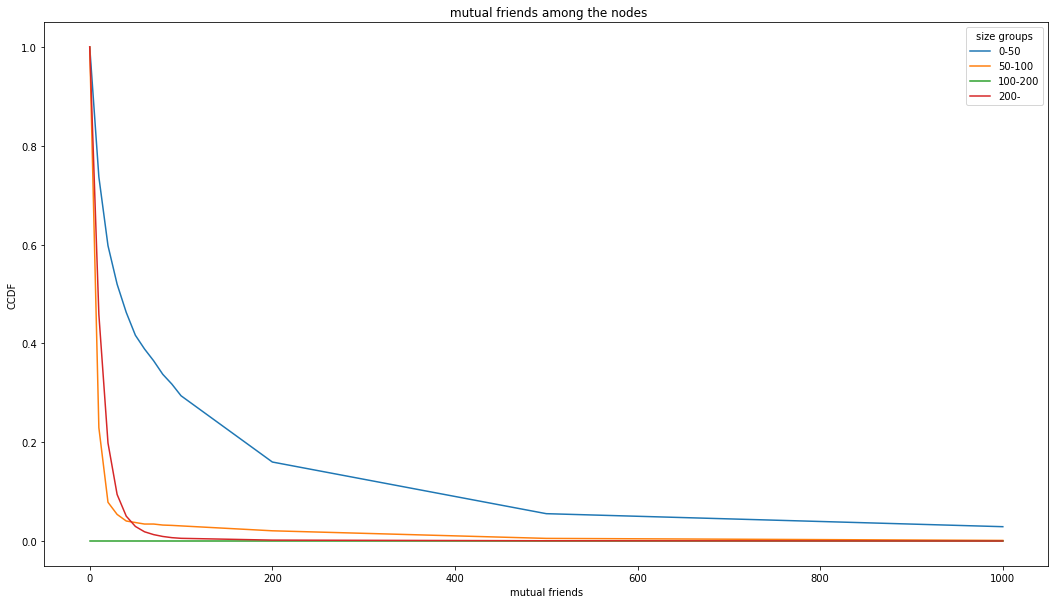

In [447]:
plt.figure(figsize=(18,10))
plt.plot(mut_friends_d1.keys(), mut_friends_d1.values(),label='0-50')
plt.plot(mut_friends_d2.keys(), mut_friends_d2.values(),label='50-100')
plt.plot(mut_friends_d3.keys(), mut_friends_d3.values(),label='100-200')
plt.plot(mut_friends_d4.keys(), mut_friends_d4.values(),label='200-')
# plt.xticks(list(mut_friends_d1.keys()))
plt.ylabel("CCDF")
plt.xlabel("mutual friends")
plt.title(" mutual friends among the nodes")
plt.legend(title='size groups')
plt.show()

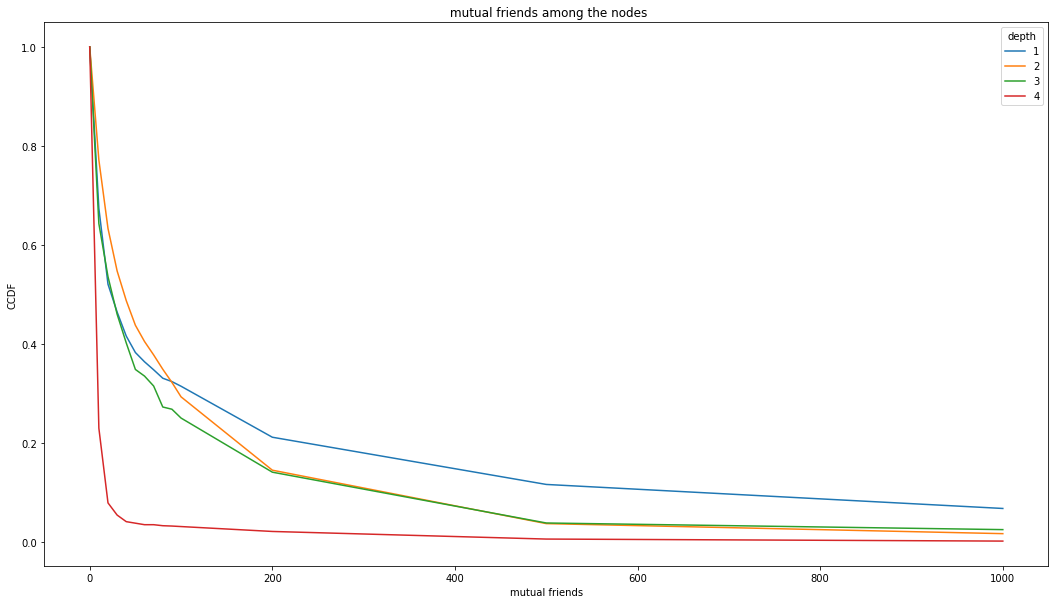

In [444]:
plt.figure(figsize=(18,10))
plt.plot(mut_friends_d1.keys(), mut_friends_d1.values(),label='0-50')
plt.plot(mut_friends_d2.keys(), mut_friends_d2.values(),label='50-100')
plt.plot(mut_friends_d3.keys(), mut_friends_d3.values(),label='100-200')
plt.plot(mut_friends_d4.keys(), mut_friends_d4.values(),label='200-')
# plt.xticks(list(mut_friends_d1.keys()))
plt.ylabel("CCDF")
plt.xlabel("mutual friends")
plt.title(" mutual friends among the nodes")
plt.legend(title='size groups')
plt.show()

## homophility

In [ ]:
## get the countries from location data..


## testing

In [536]:
counter = 0
for idx,file in enumerate(filenames):
    G = nx.read_gpickle(os.path.join(os.getcwd(),graph_path,file))
    if (G):
        print(idx,len(G.nodes()),file)
    else:
        print("here")
        os.remove(os.path.join(os.getcwd(),graph_path,file))

0 2 G_2764364902_15.gpickle
1 8 G_juul_cascade.gpickle
2 2 G_151973643_4.gpickle
3 387 tattoo.gpickle
4 3 G_3.gpickle
5 8 G_2937602802_8.gpickle
6 6 G_16870853_7.gpickle


In [92]:
from authentication import Authenticate
from collections import deque

In [93]:
auth = Authenticate()
apis = deque(auth.api)

In [766]:
import datetime

In [511]:
G= nx.read_gpickle("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/graphs/G_juul_cascade.gpickle")

In [750]:
df_cascade = cascade[['tweetCreatedAt','userID']]

In [840]:
series

{0: 0, 2: 0.5, 4: 0.75, 6: 0.875, 8: 0.875, 10: 1.0}

In [831]:
time_s

{0: 0, 2: 0.5, 4: 0.75, 6: 0.875, 8: 0.875, 10: 1.0}

In [790]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [340]:
G.nodes()

NodeView((15247690, 16870853, 34342490, 22212944, 423906777, 207413706))

In [343]:
G.nodes[22212944]

{'friends': 1396, 'followers': 313, 'level': 1}

In [330]:
cas = Cascade()
df_tweets = cas.get_unique_tweets(hexagon_data)

In [464]:
set([1]) == set({1})

True